In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cmocean #A package with beautiful colormaps
import cartopy #Useful for plotting maps
import cartopy.util #Requires separate import
import cartopy.crs as ccrs
import pandas as pd
from scipy import stats
from math import cos,radians
import copy
import matplotlib.gridspec as gridspec

plot_path = '/home/u/u241308/figures/'

/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
#--------------------- select location ---------------------
location = 'Europe'
#location = 'North_America'
#location = 'Asia'

In [3]:
#--------------------- select HW parameters ---------------------
# Consecutive days for heatwave detection
c_days = 6

# Threshold percentile
percentile = 90 #95

#Definition type: daily moving threshold (mov_day) or JA moving threshold (mov_JA)
def_type = 'fix_day'

ref_min = 1985
ref_max = 2014

In [4]:
def change_lon(data1,shape):
    data1['lon'] = np.where(data1.lon >180, data1.lon-360,data1.lon)
    ind = np.argsort(data1.lon)
    ind.values
    if shape == 3:
        data1 = data1[:,:,ind.values]
    if shape == 2:
        data1 = data1[:,ind.values]
    return(data1)

In [5]:
ref_hist_min = 1850
ref_hist_max = 1879

# Load exceed for eobs

In [6]:
path = '/work/uo1075/u241308/data_python_PostDoc/HW_expansion/anomaly/'
file = 'hw_exceedance_all_HW_%id'%c_days +'_%s'%percentile+ '_' + def_type + '_eobs_ref_%i'%ref_min + '-%i'%ref_max + '_JJA_'+location+'_anomaly.npy'
hw_exceed_eobs = np.load(path+file).sum(axis=(1,2))
years_eobs = np.arange(1950,2023)

In [7]:
years_eobs = np.arange(1950,2023)

# Load MPI

In [8]:
#for plotting ensemble range
up_pct = 95
low_pct = 5

In [9]:
#Historical
path = '/work/uo1075/u241308/grand_ensemble_cmip6/tas/ens1_30/' #first 30 members
file = 'nGE_GMT_HIST_ym.nc'
GMT_hist_1 = xr.open_dataset(path+file)
GMT_hist_1 = GMT_hist_1.tas

path = '/work/uo1075/u241308/grand_ensemble_cmip6/tas/ens31_50/' #second 20 members
file = 'nGE_GMT_HIST_ym.nc'
GMT_hist_2 = xr.open_dataset(path+file)
GMT_hist_2 = GMT_hist_2.tas

GMT_hist = xr.concat((GMT_hist_1,GMT_hist_2),'height') #concatenate 50 members
GMT_hist_mean = GMT_hist.mean(axis=(1,2,3)) #average over ensemble members and lon/lat (non existent)

GMT_ref = GMT_hist_mean[(GMT_hist_mean.time.dt.year>=ref_hist_min)&(GMT_hist_mean.time.dt.year<=ref_hist_max)].mean()

#ssp245
path = '/work/uo1075/u241308/grand_ensemble_cmip6/tas/ens1_30/' #first 30 members
file = 'nGE_GMT_ssp245_ym.nc'
GMT_ssp245_1 = xr.open_dataset(path+file)
GMT_ssp245_1 = GMT_ssp245_1.tas

path = '/work/uo1075/u241308/grand_ensemble_cmip6/tas/ens31_50/' #second 20 members
file = 'nGE_GMT_ssp245_ym.nc'
GMT_ssp245_2 = xr.open_dataset(path+file)
GMT_ssp245_2 = GMT_ssp245_2.tas

GMT_ssp245 = xr.concat((GMT_ssp245_1,GMT_ssp245_2),'height') #concatenate 50 members
GMT_ssp245_mean = GMT_ssp245.mean(axis=(1,2,3)) #average over ensemble members and lon/lat (non existent)

#ssp585
path = '/work/uo1075/u241308/grand_ensemble_cmip6/tas/ens1_30/' #first 30 members
file = 'nGE_GMT_ssp585_ym.nc'
GMT_ssp585_1 = xr.open_dataset(path+file)
GMT_ssp585_1 = GMT_ssp585_1.tas

path = '/work/uo1075/u241308/grand_ensemble_cmip6/tas/ens31_50/' #second 20 members
file = 'nGE_GMT_ssp585_ym.nc'
GMT_ssp585_2 = xr.open_dataset(path+file)
GMT_ssp585_2 = GMT_ssp585_2.tas

GMT_ssp585 = xr.concat((GMT_ssp585_1,GMT_ssp585_2),'height') #concatenate 50 members
GMT_ssp585_mean = GMT_ssp585.mean(axis=(1,2,3)) #average over ensemble members and lon/lat (non existent)

#compute anomalies for ensemble mean
GMTA_hist_mean_mpi = GMT_hist_mean - GMT_ref
GMTA_ssp245_mean_mpi = GMT_ssp245_mean - GMT_ref
GMTA_ssp585_mean_mpi = GMT_ssp585_mean - GMT_ref

/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


In [10]:
#Hist
ens = 50
years_hist = np.arange(1850,2015)
hw_exceed_hist = np.zeros((ens,years_hist.shape[0]))

path = '/work/uo1075/u241308/data_python_PostDoc/HW_expansion/anomaly/MPI_GE/HIST/'
for n_ens in range(ens):
    file = 'hw_exceedance_all_HW_%id'%c_days +'_%s'%percentile+ '_' + def_type + '_GE_HIST_ref_%i'%ref_min + '-%i'%ref_max + '_JJA_'+location+'_ensemble_%i_anomaly.npy'%n_ens
    hw_exceed_hist[n_ens,:] = np.load(path+file).sum(axis=(1,2))
hw_exceed_hist_std_mpi = np.nanstd(hw_exceed_hist,axis=0)
hw_exceed_hist_mean_mpi = np.nanmean(hw_exceed_hist,axis=0)
upper_hist_mpi = np.percentile(hw_exceed_hist,up_pct,axis=0)
lower_hist_mpi = np.percentile(hw_exceed_hist,low_pct,axis=0)

scaling_mpi = hw_exceed_hist.mean()

#ssp245
years_ssp245 = np.arange(2015,2101)
hw_exceed_ssp245 = np.zeros((ens,years_ssp245.shape[0]))

path = '/work/uo1075/u241308/data_python_PostDoc/HW_expansion/anomaly/MPI_GE/ssp245/'
for n_ens in range(ens):
    file = 'hw_exceedance_all_HW_%id'%c_days +'_%s'%percentile+ '_' + def_type + '_GE_ssp245_ref_%i'%ref_min + '-%i'%ref_max + '_JJA_'+location+'_ensemble_%i_anomaly.npy'%n_ens
    hw_exceed_ssp245[n_ens,:] = np.load(path+file).sum(axis=(1,2))
hw_exceed_ssp245_std_mpi = np.nanstd(hw_exceed_ssp245,axis=0)
hw_exceed_ssp245_mean_mpi = np.nanmean(hw_exceed_ssp245,axis=0)
upper_ssp245_mpi = np.percentile(hw_exceed_ssp245,up_pct,axis=0)
lower_ssp245_mpi = np.percentile(hw_exceed_ssp245,low_pct,axis=0)

#ssp585
years_ssp585 = np.arange(2015,2101)
hw_exceed_ssp585 = np.zeros((ens,years_ssp585.shape[0]))

path = '/work/uo1075/u241308/data_python_PostDoc/HW_expansion/anomaly/MPI_GE/ssp585/'
for n_ens in range(ens):
    file = 'hw_exceedance_all_HW_%id'%c_days +'_%s'%percentile+ '_' + def_type + '_GE_ssp585_ref_%i'%ref_min + '-%i'%ref_max + '_JJA_'+location+'_ensemble_%i_anomaly.npy'%n_ens
    hw_exceed_ssp585[n_ens,:] = np.load(path+file).sum(axis=(1,2))
hw_exceed_ssp585_std_mpi = np.nanstd(hw_exceed_ssp585,axis=0)
hw_exceed_ssp585_mean_mpi = np.nanmean(hw_exceed_ssp585,axis=0)
upper_ssp585_mpi = np.percentile(hw_exceed_ssp585,up_pct,axis=0)
lower_ssp585_mpi = np.percentile(hw_exceed_ssp585,low_pct,axis=0)

In [11]:
y_joker_exceed_std_mpi = np.concatenate((hw_exceed_ssp245_std_mpi,hw_exceed_ssp585_std_mpi))
y_joker_exceed_mean_mpi = np.concatenate((hw_exceed_ssp245_mean_mpi,hw_exceed_ssp585_mean_mpi))

x_joker_GMTA_mpi = np.concatenate((GMTA_ssp245_mean_mpi,GMTA_ssp585_mean_mpi))

lin_regres_GMTA_std_mpi = np.polyfit(x_joker_GMTA_mpi,y_joker_exceed_std_mpi,1)
lin_regres_GMTA_mean_mpi = np.polyfit(x_joker_GMTA_mpi,y_joker_exceed_mean_mpi,2)

In [12]:
x_GMTA_std_regres_plot_mpi = np.linspace(np.min(x_joker_GMTA_mpi),np.max(x_joker_GMTA_mpi))
y_GMTA_std_regres_plot_mpi = x_GMTA_std_regres_plot_mpi * lin_regres_GMTA_std_mpi[0] + lin_regres_GMTA_std_mpi[1]

x_GMTA_mean_regres_plot_mpi = np.linspace(np.min(x_joker_GMTA_mpi),np.max(x_joker_GMTA_mpi))
y_GMTA_mean_regres_plot_mpi = x_GMTA_mean_regres_plot_mpi * x_GMTA_mean_regres_plot_mpi * lin_regres_GMTA_mean_mpi[0] + x_GMTA_mean_regres_plot_mpi * lin_regres_GMTA_mean_mpi[1] + lin_regres_GMTA_mean_mpi[2]

In [13]:
#hw_exceed_eobs = np.where(np.isnan(hw_exceed_eobs),0,hw_exceed_eobs)
hw_exceed_hist_mpi = np.where(np.isnan(hw_exceed_hist),0,hw_exceed_hist)
hw_exceed_ssp245_mpi = np.where(np.isnan(hw_exceed_ssp245),0,hw_exceed_ssp245)
hw_exceed_ssp585_mpi = np.where(np.isnan(hw_exceed_ssp585),0,hw_exceed_ssp585)


In [14]:
#Data for right bar plot
n_years = 20

hw_exceed_ssp245_endsel_mpi = hw_exceed_ssp245_mpi[:,-n_years:].reshape(-1)
upper_ssp245_endsel_mpi = np.percentile(hw_exceed_ssp245_endsel_mpi,up_pct,axis=0)
lower_ssp245_endsel_mpi = np.percentile(hw_exceed_ssp245_endsel_mpi,low_pct,axis=0)

hw_exceed_ssp585_endsel_mpi = hw_exceed_ssp585_mpi[:,-n_years:].reshape(-1)
upper_ssp585_endsel_mpi = np.percentile(hw_exceed_ssp585_endsel_mpi,up_pct,axis=0)
lower_ssp585_endsel_mpi = np.percentile(hw_exceed_ssp585_endsel_mpi,low_pct,axis=0)

hw_exceed_hist_endsel_mpi = hw_exceed_hist_mpi[:,-n_years:].reshape(-1)
upper_hist_endsel_mpi = np.percentile(hw_exceed_hist_endsel_mpi,up_pct,axis=0)
lower_hist_endsel_mpi = np.percentile(hw_exceed_hist_endsel_mpi,low_pct,axis=0)

# Load GMT and compute anomalies for rest of SMILES

In [15]:
model_list = ['MIROC6','ACCESS-ESM1-5','CanESM5']
ens_total = [50,40,50]

In [16]:
def compare_smile(model,index):
# ------------------- Load GMT -----------------
    #Historical
    path = '/work/uo1075/u241308/SMILE/'+model+'/tas/'
    file = model+'_GMT_historical_mm.nc'
    GMT_hist = xr.open_dataset(path+file)
    GMT_hist = GMT_hist.tas
    #yearly mean
    GMT_hist = GMT_hist.resample(time='Y').mean()
    #compute mean
    GMT_hist_mean = GMT_hist.mean(axis=(1,2,3)) #average over ensemble members and lon/lat (non existent)
    GMT_ref = GMT_hist_mean[(GMT_hist_mean.time.dt.year>=ref_hist_min)&(GMT_hist_mean.time.dt.year<=ref_hist_max)].mean()
    
    #ssp245
    path = '/work/uo1075/u241308/SMILE/'+model+'/tas/' 
    file = model+'_GMT_ssp245_mm.nc'
    GMT_ssp245 = xr.open_dataset(path+file)
    GMT_ssp245 = GMT_ssp245.tas
    #yearly mean
    GMT_ssp245 = GMT_ssp245.resample(time='Y').mean()
    #compute mean
    GMT_ssp245_mean = GMT_ssp245.mean(axis=(1,2,3)) #average over ensemble members and lon/lat (non existent)
    
    #ssp585
    path = '/work/uo1075/u241308/SMILE/'+model+'/tas/'
    file = model+'_GMT_ssp585_mm.nc'
    GMT_ssp585 = xr.open_dataset(path+file)
    GMT_ssp585 = GMT_ssp585.tas
    #yearly mean
    GMT_ssp585 = GMT_ssp585.resample(time='Y').mean()
    #compute mean
    GMT_ssp585_mean = GMT_ssp585.mean(axis=(1,2,3)) #average over ensemble members and lon/lat (non existent)
    
    #compute anomalies for ensemble mean
    GMTA_historical_mean = GMT_hist_mean - GMT_ref
    GMTA_ssp245_mean = GMT_ssp245_mean - GMT_ref
    GMTA_ssp585_mean = GMT_ssp585_mean - GMT_ref

# ------------------- Load exceedance -----------------
    #Hist
    years_hist = np.arange(1850,2015)
    hw_exceed_hist = np.zeros((ens_total[index],years_hist.shape[0]))
    path = '/work/uo1075/u241308/data_python_PostDoc/HW_expansion/anomaly/'+model+'/historical/'
    for n_ens in range(ens_total[index]):
        file = 'hw_exceedance_all_HW_%id'%c_days +'_%s'%percentile+ '_' + def_type + '_'+model+'_historical_ref_%i'%ref_min + '-%i'%ref_max + '_JJA_'+location+'_ensemble_%i_anomaly.npy'%n_ens
        hw_exceed_hist[n_ens,:] = np.load(path+file).sum(axis=(1,2))
    hw_exceed_hist_std = np.nanstd(hw_exceed_hist,axis=0)
    hw_exceed_hist_mean = np.nanmean(hw_exceed_hist,axis=0)
    upper_hist = np.percentile(hw_exceed_hist,up_pct,axis=0)
    lower_hist = np.percentile(hw_exceed_hist,low_pct,axis=0)
    scaling = hw_exceed_hist.mean()
    
    #ssp245
    years_ssp245 = np.arange(2015,2101)
    hw_exceed_ssp245 = np.zeros((ens_total[index],years_ssp245.shape[0]))
    path = '/work/uo1075/u241308/data_python_PostDoc/HW_expansion/anomaly/'+model+'/ssp245/'
    for n_ens in range(ens_total[index]):
        file = 'hw_exceedance_all_HW_%id'%c_days +'_%s'%percentile+ '_' + def_type + '_'+model+'_ssp245_ref_%i'%ref_min + '-%i'%ref_max + '_JJA_'+location+'_ensemble_%i_anomaly.npy'%n_ens
        hw_exceed_ssp245[n_ens,:] = np.load(path+file).sum(axis=(1,2))
    hw_exceed_ssp245_std = np.nanstd(hw_exceed_ssp245,axis=0)
    hw_exceed_ssp245_mean = np.nanmean(hw_exceed_ssp245,axis=0)
    upper_ssp245 = np.percentile(hw_exceed_ssp245,up_pct,axis=0)
    lower_ssp245 = np.percentile(hw_exceed_ssp245,low_pct,axis=0)
    
    #ssp585
    years_ssp585 = np.arange(2015,2101)
    hw_exceed_ssp585 = np.zeros((ens_total[index],years_ssp585.shape[0]))
    
    path = '/work/uo1075/u241308/data_python_PostDoc/HW_expansion/anomaly/'+model+'/ssp585/'
    for n_ens in range(ens_total[index]):
        file = 'hw_exceedance_all_HW_%id'%c_days +'_%s'%percentile+ '_' + def_type + '_'+model+'_ssp585_ref_%i'%ref_min + '-%i'%ref_max + '_JJA_'+location+'_ensemble_%i_anomaly.npy'%n_ens
        hw_exceed_ssp585[n_ens,:] = np.load(path+file).sum(axis=(1,2))
    hw_exceed_ssp585_std = np.nanstd(hw_exceed_ssp585,axis=0)
    hw_exceed_ssp585_mean = np.nanmean(hw_exceed_ssp585,axis=0)
    upper_ssp585 = np.percentile(hw_exceed_ssp585,up_pct,axis=0)
    lower_ssp585 = np.percentile(hw_exceed_ssp585,low_pct,axis=0)
    
# ------------------- Regress to mean temperatures -----------------
    y_joker_exceed_std = np.concatenate((hw_exceed_ssp245_std,hw_exceed_ssp585_std))
    y_joker_exceed_mean = np.concatenate((hw_exceed_ssp245_mean,hw_exceed_ssp585_mean))
    
    x_joker_GMTA = np.concatenate((GMTA_ssp245_mean,GMTA_ssp585_mean))
    
    lin_regres_GMTA_std = np.polyfit(x_joker_GMTA,y_joker_exceed_std,1)
    lin_regres_GMTA_mean = np.polyfit(x_joker_GMTA,y_joker_exceed_mean,2)
    
    x_GMTA_std_regres_plot = np.linspace(np.min(x_joker_GMTA),np.max(x_joker_GMTA))
    y_GMTA_std_regres_plot = x_GMTA_std_regres_plot * lin_regres_GMTA_std[0] + lin_regres_GMTA_std[1]
    
    x_GMTA_mean_regres_plot = np.linspace(np.min(x_joker_GMTA),np.max(x_joker_GMTA))
    y_GMTA_mean_regres_plot = x_GMTA_mean_regres_plot * x_GMTA_mean_regres_plot * lin_regres_GMTA_mean[0] + x_GMTA_mean_regres_plot * lin_regres_GMTA_mean[1] + lin_regres_GMTA_mean[2]
    hw_exceed_hist = np.where(np.isnan(hw_exceed_hist),0,hw_exceed_hist)
    hw_exceed_ssp245 = np.where(np.isnan(hw_exceed_ssp245),0,hw_exceed_ssp245)
    hw_exceed_ssp585 = np.where(np.isnan(hw_exceed_ssp585),0,hw_exceed_ssp585)

    #Data for right bar plot
    n_years = 20
    
    hw_exceed_ssp245_endsel = hw_exceed_ssp245[:,-n_years:].reshape(-1)
    upper_ssp245_endsel = np.percentile(hw_exceed_ssp245_endsel,up_pct,axis=0)
    lower_ssp245_endsel = np.percentile(hw_exceed_ssp245_endsel,low_pct,axis=0)
    
    hw_exceed_ssp585_endsel = hw_exceed_ssp585[:,-n_years:].reshape(-1)
    upper_ssp585_endsel = np.percentile(hw_exceed_ssp585_endsel,up_pct,axis=0)
    lower_ssp585_endsel = np.percentile(hw_exceed_ssp585_endsel,low_pct,axis=0)
    
    hw_exceed_hist_endsel = hw_exceed_hist[:,-n_years:].reshape(-1)
    upper_hist_endsel = np.percentile(hw_exceed_hist_endsel,up_pct,axis=0)
    lower_hist_endsel = np.percentile(hw_exceed_hist_endsel,low_pct,axis=0)


    return(scaling,upper_hist_endsel,lower_hist_endsel,upper_ssp245_endsel,lower_ssp245_endsel,upper_ssp585_endsel,lower_ssp585_endsel,upper_hist,lower_hist,upper_ssp245,lower_ssp245,upper_ssp585,lower_ssp585,GMTA_ssp245_mean,GMTA_ssp585_mean,hw_exceed_hist_mean,hw_exceed_ssp245_mean,hw_exceed_ssp585_mean,x_GMTA_mean_regres_plot,y_GMTA_mean_regres_plot,lin_regres_GMTA_mean,hw_exceed_ssp245_std,hw_exceed_ssp585_std,x_GMTA_std_regres_plot,y_GMTA_std_regres_plot,lin_regres_GMTA_std)

In [17]:
#MIROC6
scaling_miroc,upper_hist_endsel_miroc,lower_hist_endsel_miroc,upper_ssp245_endsel_miroc,lower_ssp245_endsel_miroc,upper_ssp585_endsel_miroc,lower_ssp585_endsel_miroc,upper_hist_miroc,lower_hist_miroc,upper_ssp245_miroc,lower_ssp245_miroc,upper_ssp585_miroc,lower_ssp585_miroc,GMTA_ssp245_mean_miroc,GMTA_ssp585_mean_miroc,hw_exceed_hist_mean_miroc,hw_exceed_ssp245_mean_miroc,hw_exceed_ssp585_mean_miroc,x_GMTA_mean_regres_plot_miroc,y_GMTA_mean_regres_plot_miroc,lin_regres_GMTA_mean_miroc,hw_exceed_ssp245_std_miroc,hw_exceed_ssp585_std_miroc,x_GMTA_std_regres_plot_miroc,y_GMTA_std_regres_plot_miroc,lin_regres_GMTA_std_miroc = compare_smile(model_list[0],0)

#ACCESS-ESM1-5
scaling_access,upper_hist_endsel_access,lower_hist_endsel_access,upper_ssp245_endsel_access,lower_ssp245_endsel_access,upper_ssp585_endsel_access,lower_ssp585_endsel_access,upper_hist_access,lower_hist_access,upper_ssp245_access,lower_ssp245_access,upper_ssp585_access,lower_ssp585_access,GMTA_ssp245_mean_access,GMTA_ssp585_mean_access,hw_exceed_hist_mean_access,hw_exceed_ssp245_mean_access,hw_exceed_ssp585_mean_access,x_GMTA_mean_regres_plot_access,y_GMTA_mean_regres_plot_access,lin_regres_GMTA_mean_access,hw_exceed_ssp245_std_access,hw_exceed_ssp585_std_access,x_GMTA_std_regres_plot_access,y_GMTA_std_regres_plot_access,lin_regres_GMTA_std_access = compare_smile(model_list[1],1)

#CanESM5
scaling_canesm,upper_hist_endsel_canesm,lower_hist_endsel_canesm,upper_ssp245_endsel_canesm,lower_ssp245_endsel_canesm,upper_ssp585_endsel_canesm,lower_ssp585_endsel_canesm,upper_hist_canesm,lower_hist_canesm,upper_ssp245_canesm,lower_ssp245_canesm,upper_ssp585_canesm,lower_ssp585_canesm,GMTA_ssp245_mean_canesm,GMTA_ssp585_mean_canesm,hw_exceed_hist_mean_canesm,hw_exceed_ssp245_mean_canesm,hw_exceed_ssp585_mean_canesm,x_GMTA_mean_regres_plot_canesm,y_GMTA_mean_regres_plot_canesm,lin_regres_GMTA_mean_canesm,hw_exceed_ssp245_std_canesm,hw_exceed_ssp585_std_canesm,x_GMTA_std_regres_plot_canesm,y_GMTA_std_regres_plot_canesm,lin_regres_GMTA_std_canesm = compare_smile(model_list[2],2)

/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/core/groupby.py:1451: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouper = pd.Grouper(
/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/core/groupby.py:1451: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouper = pd.Grouper(
/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/core/groupby.py:1451: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouper = pd.Grouper(
/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/core/groupby.py:1451: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouper = pd.Grouper(
/sw/spack-levante/mambaforge-23.1.0-1-Linux-

In [18]:
print('Ens. STD change with GMTA:')
print('ACCESS: %2.2f' %lin_regres_GMTA_std_access[0])
print('CanESM: %2.2f' %lin_regres_GMTA_std_canesm[0])
print('MIROC: %2.2f' %lin_regres_GMTA_std_miroc[0])
print('MPI-GE: %2.2f' %lin_regres_GMTA_std_mpi[0])
      

Ens. STD change with GMTA:
ACCESS: 2159.75
CanESM: 1197.52
MIROC: 1738.43
MPI-GE: 2372.38


In [19]:
scaling_access = hw_exceed_eobs.mean()
scaling_canesm = hw_exceed_eobs.mean()
scaling_miroc = hw_exceed_eobs.mean()
scaling_mpi = hw_exceed_eobs.mean()

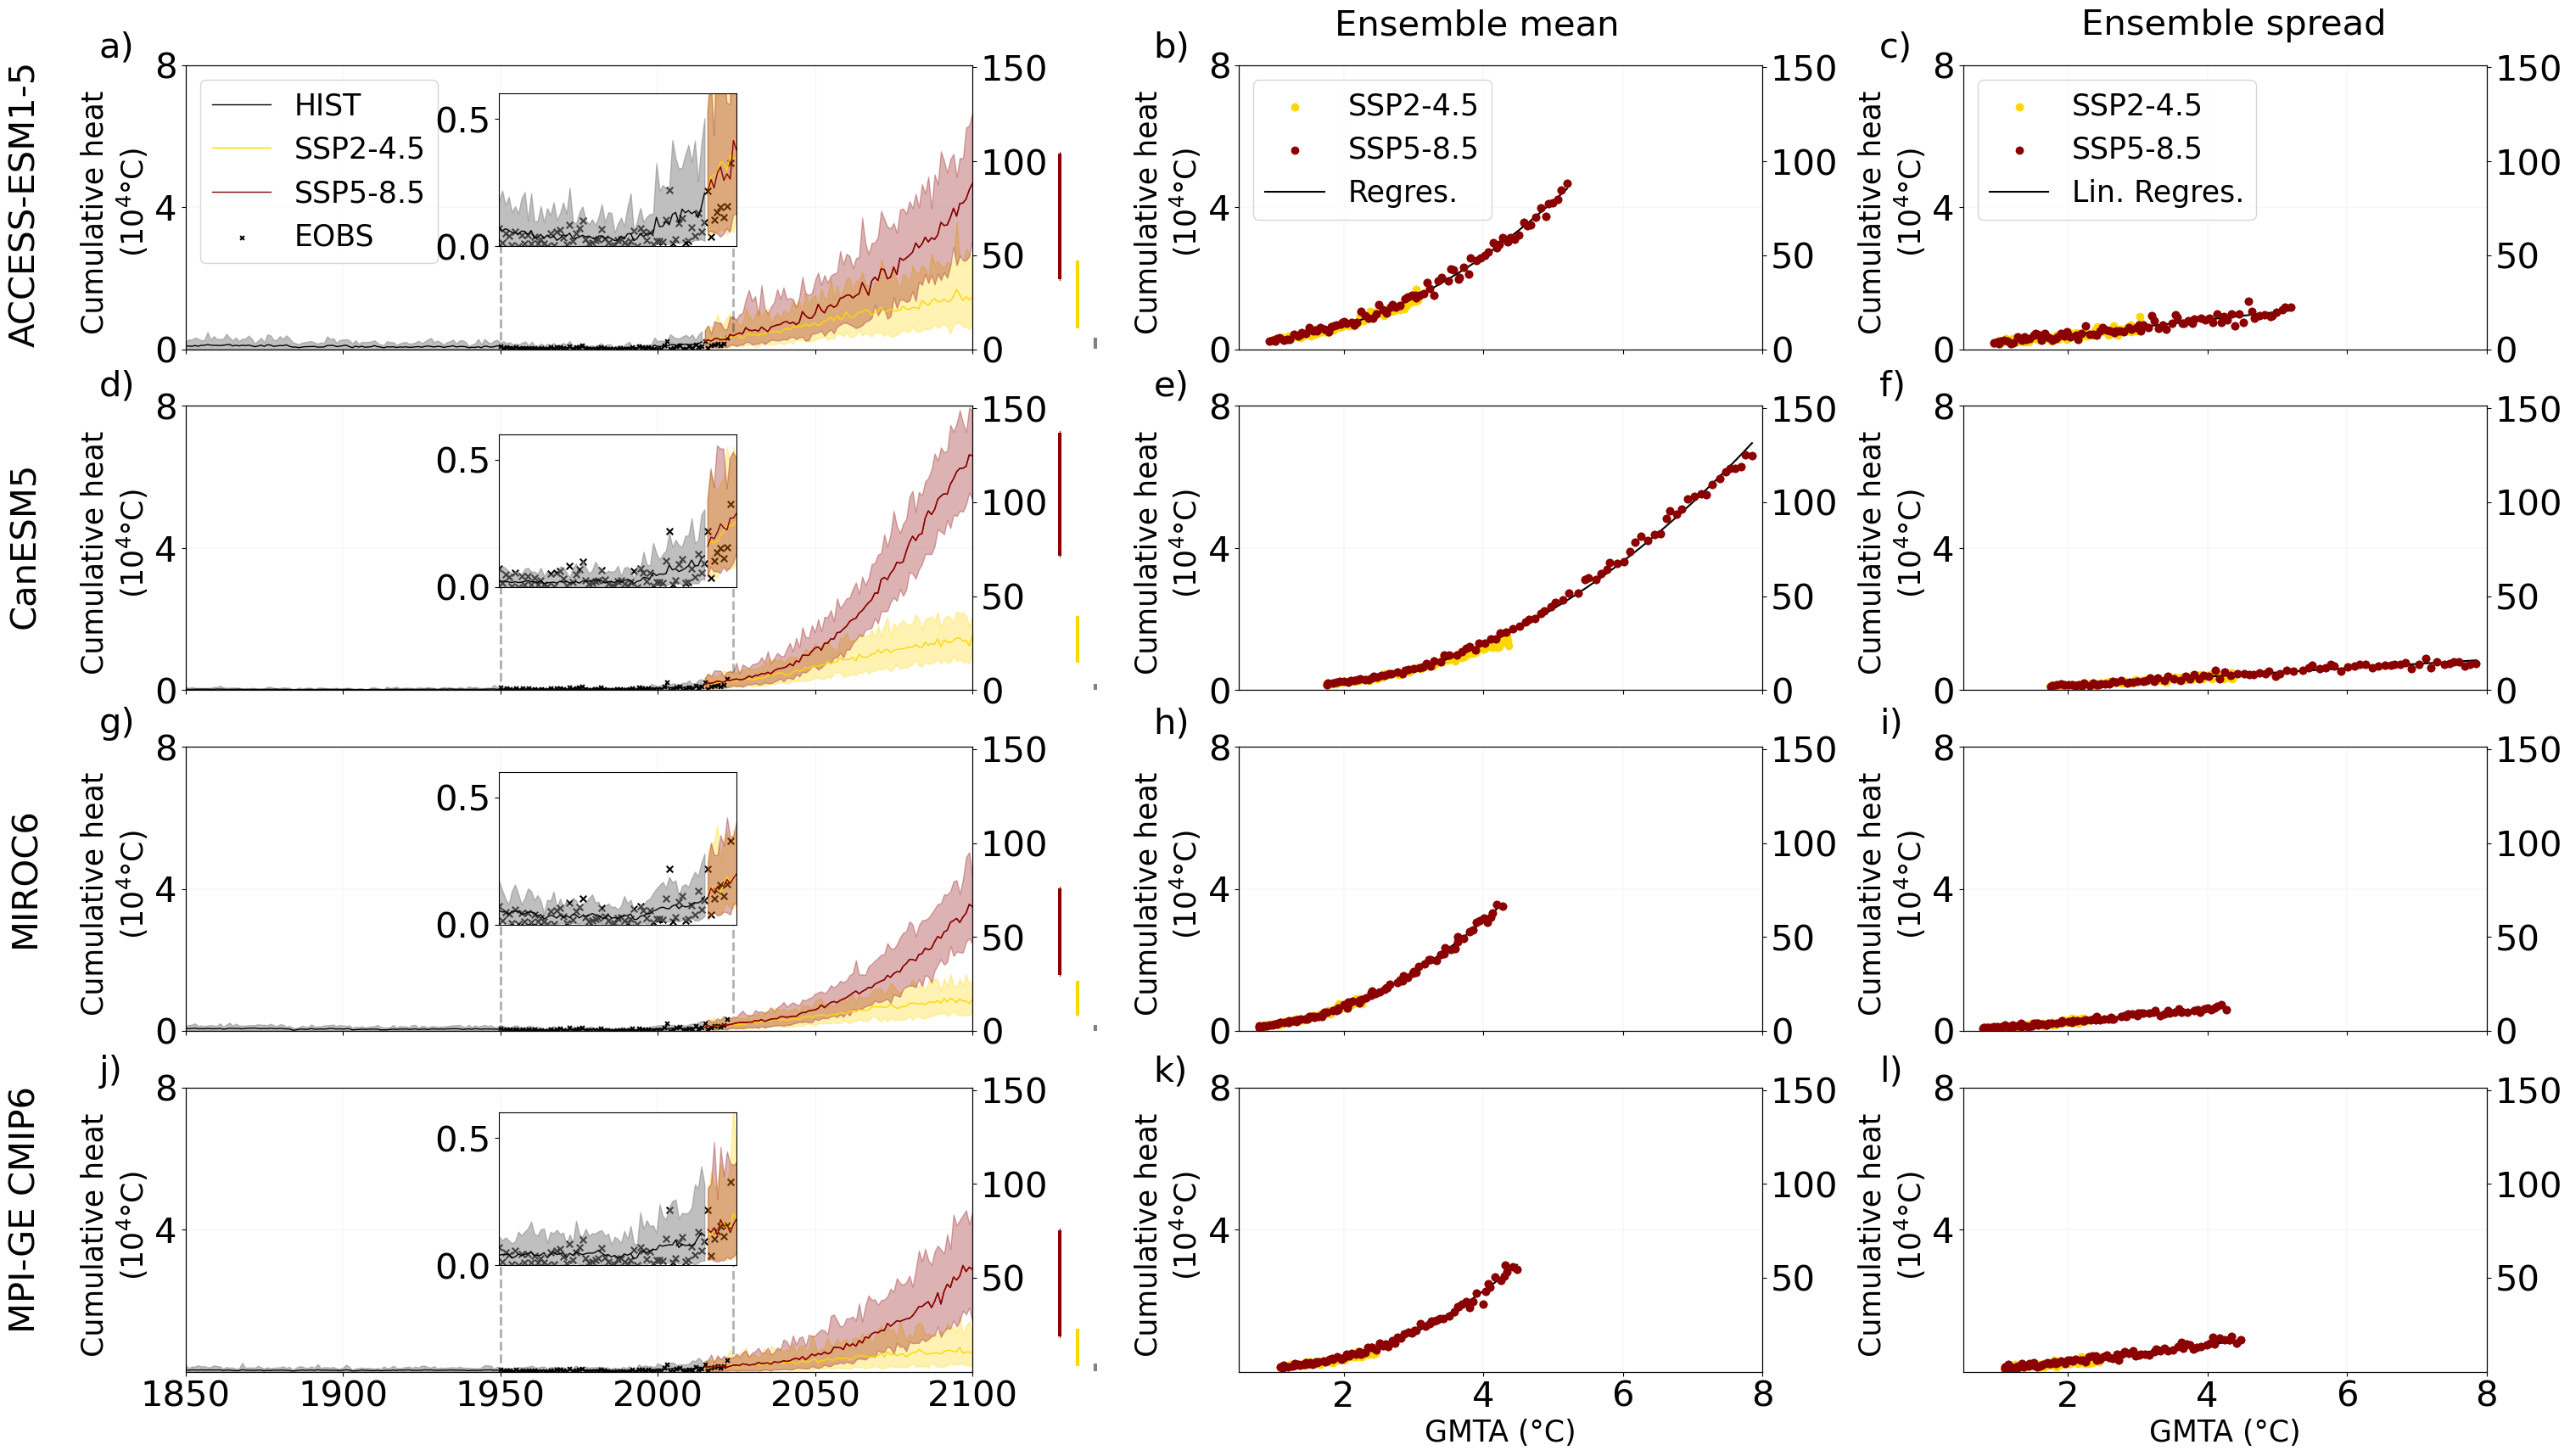

In [61]:
gs = gridspec.GridSpec(4, 40,hspace=0.2, wspace=0.2)
gs.update(wspace=0.05)

fig = plt.figure(figsize=(40,20))
plt.rcParams.update({'font.size': 30})
y_lim_min = 0
y_lim_max = 80000
x_lim_min = 0.5
x_lim_max = 8

legend_fsize = 25
ticks_fsize = 30
label_fsize = 25
reduce_ylabel = 10000

# ------------------------------------ ACCESS ------------------------------------
#  1st figure 
y_lim1 = 80000
y_lim2 = y_lim1/scaling_access

ax1_main = plt.subplot(gs[0, 0:12])

plt.plot(years_hist,hw_exceed_hist_mean_access/reduce_ylabel,color='black',label='HIST',alpha=1,linewidth=1)
plt.fill_between(years_hist,lower_hist_access/reduce_ylabel,upper_hist_access/reduce_ylabel,color='gray',alpha=0.5)

plt.plot(years_ssp245,hw_exceed_ssp245_mean_access/reduce_ylabel,color='gold',label='SSP2-4.5', alpha=1,linewidth=1)
plt.fill_between(years_ssp245,lower_ssp245_access/reduce_ylabel,upper_ssp245_access/reduce_ylabel,color='gold',alpha=0.3)

plt.plot(years_ssp585,hw_exceed_ssp585_mean_access/reduce_ylabel,color='darkred',label='SSP5-8.5', alpha=1,linewidth=1)
plt.fill_between(years_ssp585,lower_ssp585_access/reduce_ylabel,upper_ssp585_access/reduce_ylabel,color='darkred',alpha=0.3)

plt.ylabel('Cumulative heat \n ($10^4$°C)',fontsize=label_fsize)
plt.yticks([0,40000/reduce_ylabel,80000/reduce_ylabel],fontsize=ticks_fsize)
plt.xticks(fontsize=ticks_fsize)
plt.ylim(0,y_lim1/reduce_ylabel)
plt.xlim(1850,2100)

plt.plot([1950,1950],[2500/reduce_ylabel,30000/reduce_ylabel],'--k',linewidth=2,alpha=0.3)
plt.plot([2024,2024],[5000/reduce_ylabel,30000/reduce_ylabel],'--k',linewidth=2,alpha=0.3)

#EOBS
plt.scatter(years_eobs,hw_exceed_eobs/reduce_ylabel,c='k',label='EOBS', alpha=1,marker='x',s=12)
plt.legend(fontsize=legend_fsize,loc='upper left')
plt.grid(linewidth=0.1)

#twin axis
twin2 = ax1_main.twinx()
twin2.plot(years_ssp585,hw_exceed_ssp585_mean_access/scaling_access,color='darkred',label='SSP5-8.5', alpha=1,linewidth=1)
plt.ylim(0,y_lim2)
plt.yticks([0,50,100,150],fontsize=ticks_fsize)
plt.xticks(fontsize=ticks_fsize)

#lines below plot
ax12 = plt.subplot(gs[0, 13:15], )
chartBox = ax12.get_position()
ax12.set_position([chartBox.x0+0.005, 
                  chartBox.y0,
                  chartBox.width*0.3,
                  chartBox.height])

ax12.vlines(0,lower_ssp585_endsel_access,upper_ssp585_endsel_access,'darkred',linewidth = 3)
ax12.hlines(lower_ssp585_endsel_access,-0.025,0.025,'darkred',linewidth = 3)
ax12.hlines(upper_ssp585_endsel_access,-0.025,0.025,'darkred',linewidth = 3)
ax12.vlines(8,lower_ssp245_endsel_access,upper_ssp245_endsel_access,'gold',linewidth = 3)
ax12.hlines(lower_ssp245_endsel_access,0.175,0.225,'gold')
ax12.hlines(upper_ssp245_endsel_access,0.175,0.225,'gold')
ax12.vlines(16,lower_hist_endsel_access,upper_hist_endsel_access,'gray',linewidth = 3)
ax12.hlines(lower_hist_endsel_access,0.475,0.525,'gray')
ax12.hlines(upper_hist_endsel_access,0.475,0.525,'gray')

ax12.set_ylim(0,y_lim1)
ax12.axis('off')

#  2nd figure 
y_lim_max2 = y_lim_max/scaling_access
y_lim_min2 = y_lim_min/scaling_access

ax2_main = plt.subplot(gs[0, 16:24], )
plt.scatter(GMTA_ssp245_mean_access,hw_exceed_ssp245_mean_access/reduce_ylabel,c='gold',label='SSP2-4.5')
plt.scatter(GMTA_ssp585_mean_access,hw_exceed_ssp585_mean_access/reduce_ylabel,c='darkred',label='SSP5-8.5')

plt.plot(x_GMTA_mean_regres_plot_access,y_GMTA_mean_regres_plot_access/reduce_ylabel,'k',label='Regres.')
#plt.text(2,30,'Cum. heat (°C) = %2.2f'%lin_regres_GMTA_mean_access[0]+'*GMTA + %2.2f'%lin_regres_GMTA_mean_access[1],fontsize=20)

plt.ylabel('Cumulative heat \n ($10^4$°C)',fontsize=label_fsize)
#plt.xlabel('GMTA (°C)',fontsize=label_fsize)
plt.yticks([0,40000/reduce_ylabel,80000/reduce_ylabel],fontsize=ticks_fsize)
plt.xticks(fontsize=ticks_fsize)
plt.ylim(y_lim_min,y_lim_max/reduce_ylabel)
plt.xlim(x_lim_min,x_lim_max)

plt.legend(fontsize=legend_fsize,loc='upper left')
plt.grid(linewidth=0.1)

#twin axis
twin2 = ax2_main.twinx()
twin2.scatter(GMTA_ssp585_mean_access,hw_exceed_ssp585_mean_access/scaling_access,color='darkred',label='SSP5-8.5')
plt.ylim(y_lim_min2,y_lim_max2)
plt.yticks([0,50,100,150],fontsize=ticks_fsize)
plt.xticks(fontsize=ticks_fsize)

#  3rd figure 
ax3_main = plt.subplot(gs[0, 27:35], )
plt.scatter(GMTA_ssp245_mean_access,hw_exceed_ssp245_std_access/reduce_ylabel,c='gold',label='SSP2-4.5')
plt.scatter(GMTA_ssp585_mean_access,hw_exceed_ssp585_std_access/reduce_ylabel,c='darkred',label='SSP5-8.5')

plt.plot(x_GMTA_mean_regres_plot_access,y_GMTA_std_regres_plot_access/reduce_ylabel,'k',label='Lin. Regres.')
#plt.text(2,30,'Cum. heat (°C) = %2.2f'%lin_regres_GMTA_std_access[0]+'*GMTA + %2.2f'%lin_regres_GMTA_std_access[1],fontsize=20)

plt.ylabel('Cumulative heat \n ($10^4$°C)',fontsize=label_fsize)
#plt.xlabel('GMTA (°C)',fontsize=label_fsize)
plt.yticks([0,40000/reduce_ylabel,80000/reduce_ylabel],fontsize=ticks_fsize)
plt.xticks(fontsize=ticks_fsize)
plt.ylim(y_lim_min,y_lim_max/reduce_ylabel)
plt.xlim(x_lim_min,x_lim_max)

plt.legend(fontsize=legend_fsize,loc='upper left')
plt.grid(linewidth=0.1)

#twin axis
twin2 = ax3_main.twinx()
twin2.scatter(GMTA_ssp585_mean_access,hw_exceed_ssp585_std_access/scaling_access,color='darkred',label='SSP5-8.5')
plt.ylim(y_lim_min2,y_lim_max2)
plt.yticks([0,50,100,150],fontsize=ticks_fsize)
plt.xticks(fontsize=ticks_fsize)

# ------------------------------------ CanESM5 ------------------------------------
#  1st figure 
y_lim2 = y_lim1/scaling_canesm

ax1 = plt.subplot(gs[1, 0:12],sharex=ax1_main,xticklabels=[] )

plt.plot(years_hist,hw_exceed_hist_mean_canesm/reduce_ylabel,color='black',alpha=1,linewidth=1)#,label='HIST')
plt.fill_between(years_hist,lower_hist_canesm/reduce_ylabel,upper_hist_canesm/reduce_ylabel,color='gray',alpha=0.5)

plt.plot(years_ssp245,hw_exceed_ssp245_mean_canesm/reduce_ylabel,color='gold', alpha=1,linewidth=1)#,label='SSP2-4.5')
plt.fill_between(years_ssp245,lower_ssp245_canesm/reduce_ylabel,upper_ssp245_canesm/reduce_ylabel,color='gold',alpha=0.3)

plt.plot(years_ssp585,hw_exceed_ssp585_mean_canesm/reduce_ylabel,color='darkred', alpha=1,linewidth=1)#,label='SSP5-8.5')
plt.fill_between(years_ssp585,lower_ssp585_canesm/reduce_ylabel,upper_ssp585_canesm/reduce_ylabel,color='darkred',alpha=0.3)

plt.ylabel('Cumulative heat \n ($10^4$°C)',fontsize=label_fsize)
plt.yticks([0,40000/reduce_ylabel,80000/reduce_ylabel],fontsize=ticks_fsize)
plt.xticks(fontsize=ticks_fsize)
plt.ylim(0,y_lim1/reduce_ylabel)
plt.xlim(1850,2100)

plt.plot([1950,1950],[2500/reduce_ylabel,30000/reduce_ylabel],'--k',linewidth=2,alpha=0.3)
plt.plot([2024,2024],[5000/reduce_ylabel,30000/reduce_ylabel],'--k',linewidth=2,alpha=0.3)

#EOBS
plt.scatter(years_eobs,hw_exceed_eobs/reduce_ylabel,c='k', alpha=1,marker='x',s=12)#,label='EOBS')
#plt.legend(fontsize=20,loc='upper left')
plt.grid(linewidth=0.1)

#twin axis
twin2 = ax1.twinx()
twin2.plot(years_ssp585,hw_exceed_ssp585_mean_canesm/scaling_canesm,color='darkred', alpha=1,linewidth=1)#,label='SSP5-8.5')
plt.ylim(0,y_lim2)
plt.yticks([0,50,100,150],fontsize=ticks_fsize)
plt.xticks(fontsize=ticks_fsize)

#lines below plot
ax12 = plt.subplot(gs[1, 13:15], )
chartBox = ax12.get_position()
ax12.set_position([chartBox.x0+0.005, 
                  chartBox.y0,
                  chartBox.width*0.3,
                  chartBox.height])

ax12.vlines(0,lower_ssp585_endsel_canesm,upper_ssp585_endsel_canesm,'darkred',linewidth = 3)
ax12.hlines(lower_ssp585_endsel_canesm,-0.025,0.025,'darkred',linewidth = 3)
ax12.hlines(upper_ssp585_endsel_canesm,-0.025,0.025,'darkred',linewidth = 3)
ax12.vlines(8,lower_ssp245_endsel_canesm,upper_ssp245_endsel_canesm,'gold',linewidth = 3)
ax12.hlines(lower_ssp245_endsel_canesm,0.175,0.225,'gold')
ax12.hlines(upper_ssp245_endsel_canesm,0.175,0.225,'gold')
ax12.vlines(16,lower_hist_endsel_canesm,upper_hist_endsel_canesm,'gray',linewidth = 3)
ax12.hlines(lower_hist_endsel_canesm,0.475,0.525,'gray')
ax12.hlines(upper_hist_endsel_canesm,0.475,0.525,'gray')

ax12.set_ylim(0,y_lim1)
ax12.axis('off')

#  2nd figure 
y_lim_max2 = y_lim_max/scaling_canesm
y_lim_min2 = y_lim_min/scaling_canesm

ax2 = plt.subplot(gs[1, 16:24],sharex=ax2_main,xticklabels=[] )
plt.scatter(GMTA_ssp245_mean_canesm,hw_exceed_ssp245_mean_canesm/reduce_ylabel,c='gold')#,label='SSP2-4.5')
plt.scatter(GMTA_ssp585_mean_canesm,hw_exceed_ssp585_mean_canesm/reduce_ylabel,c='darkred')#,label='SSP5-8.5')

plt.plot(x_GMTA_mean_regres_plot_canesm,y_GMTA_mean_regres_plot_canesm/reduce_ylabel,'k')#,label='Regres.')
#plt.text(2,30,'Cum. heat (°C) = %2.2f'%lin_regres_GMTA_mean_canesm[0]+'*GMTA + %2.2f'%lin_regres_GMTA_mean_canesm[1],fontsize=20)

plt.ylabel('Cumulative heat \n ($10^4$°C)',fontsize=label_fsize)
#plt.xlabel('GMTA (°C)',fontsize=label_fsize)
plt.yticks([0,40000/reduce_ylabel,80000/reduce_ylabel],fontsize=ticks_fsize)
plt.xticks(fontsize=ticks_fsize)
plt.ylim(y_lim_min,y_lim_max/reduce_ylabel)
plt.xlim(x_lim_min,x_lim_max)

#plt.legend(fontsize=20,loc='upper right')
plt.grid(linewidth=0.1)

#twin axis
twin2 = ax2.twinx()
twin2.scatter(GMTA_ssp585_mean_canesm,hw_exceed_ssp585_mean_canesm/scaling_canesm,color='darkred')#,label='SSP5-8.5')
plt.ylim(y_lim_min2,y_lim_max2)
plt.yticks([0,50,100,150],fontsize=ticks_fsize)
plt.xticks(fontsize=ticks_fsize)

#  3rd figure 
ax3 = plt.subplot(gs[1, 27:35],sharex=ax3_main,xticklabels=[] )
plt.scatter(GMTA_ssp245_mean_canesm,hw_exceed_ssp245_std_canesm/reduce_ylabel,c='gold')#,label='SSP2-4.5')
plt.scatter(GMTA_ssp585_mean_canesm,hw_exceed_ssp585_std_canesm/reduce_ylabel,c='darkred')#,label='SSP5-8.5')

plt.plot(x_GMTA_mean_regres_plot_canesm,y_GMTA_std_regres_plot_canesm/reduce_ylabel,'k')#,label='Lin. Regres.')
#plt.text(2,30,'Cum. heat (°C) = %2.2f'%lin_regres_GMTA_std_canesm[0]+'*GMTA + %2.2f'%lin_regres_GMTA_std_canesm[1],fontsize=20)

plt.ylabel('Cumulative heat \n ($10^4$°C)',fontsize=label_fsize)
#plt.xlabel('GMTA (°C)',fontsize=label_fsize)
plt.yticks([0,40000/reduce_ylabel,80000/reduce_ylabel],fontsize=ticks_fsize)
plt.xticks(fontsize=ticks_fsize)
plt.ylim(y_lim_min,y_lim_max/reduce_ylabel)
plt.xlim(x_lim_min,x_lim_max)

#plt.legend(fontsize=20,loc='upper right')
plt.grid(linewidth=0.1)

#twin axis
twin2 = ax3.twinx()
twin2.scatter(GMTA_ssp585_mean_canesm,hw_exceed_ssp585_std_canesm/scaling_canesm,color='darkred')#,label='SSP5-8.5')
plt.ylim(y_lim_min2,y_lim_max2)
plt.yticks([0,50,100,150],fontsize=ticks_fsize)
plt.xticks(fontsize=ticks_fsize)

# ------------------------------------ MIROC ------------------------------------
#  1st figure 
y_lim2 = y_lim1/scaling_miroc

ax1 = plt.subplot(gs[2, 0:12],sharex=ax1_main,xticklabels=[] )

plt.plot(years_hist,hw_exceed_hist_mean_miroc/reduce_ylabel,color='black',alpha=1,linewidth=1)#,label='HIST')
plt.fill_between(years_hist,lower_hist_miroc/reduce_ylabel,upper_hist_miroc/reduce_ylabel,color='gray',alpha=0.5)

plt.plot(years_ssp245,hw_exceed_ssp245_mean_miroc/reduce_ylabel,color='gold', alpha=1,linewidth=1)#,label='SSP2-4.5')
plt.fill_between(years_ssp245,lower_ssp245_miroc/reduce_ylabel,upper_ssp245_miroc/reduce_ylabel,color='gold',alpha=0.3)

plt.plot(years_ssp585,hw_exceed_ssp585_mean_miroc/reduce_ylabel,color='darkred', alpha=1,linewidth=1)#,label='SSP5-8.5')
plt.fill_between(years_ssp585,lower_ssp585_miroc/reduce_ylabel,upper_ssp585_miroc/reduce_ylabel,color='darkred',alpha=0.3)

plt.ylabel('Cumulative heat \n ($10^4$°C)',fontsize=label_fsize)
plt.yticks([0,40000/reduce_ylabel,80000/reduce_ylabel],fontsize=ticks_fsize)
plt.xticks(fontsize=ticks_fsize)
plt.ylim(0,y_lim1/reduce_ylabel)
plt.xlim(1850,2100)

plt.plot([1950,1950],[2500/reduce_ylabel,30000/reduce_ylabel],'--k',linewidth=2,alpha=0.3)
plt.plot([2024,2024],[5000/reduce_ylabel,30000/reduce_ylabel],'--k',linewidth=2,alpha=0.3)

#EOBS
plt.scatter(years_eobs,hw_exceed_eobs/reduce_ylabel,c='k', alpha=1,marker='x',s=12)#,label='EOBS')
#plt.legend(fontsize=20,loc='upper left')
plt.grid(linewidth=0.1)

#twin axis
twin2 = ax1.twinx()
twin2.plot(years_ssp585,hw_exceed_ssp585_mean_miroc/scaling_miroc,color='darkred', alpha=1,linewidth=1)#,label='SSP5-8.5')
plt.ylim(0,y_lim2)
plt.yticks([0,50,100,150],fontsize=ticks_fsize)
plt.xticks(fontsize=ticks_fsize)

#lines below plot
ax12 = plt.subplot(gs[2, 13:15], )
chartBox = ax12.get_position()
ax12.set_position([chartBox.x0+0.005, 
                  chartBox.y0,
                  chartBox.width*0.3,
                  chartBox.height])

ax12.vlines(0,lower_ssp585_endsel_miroc,upper_ssp585_endsel_miroc,'darkred',linewidth = 3)
ax12.hlines(lower_ssp585_endsel_miroc,-0.025,0.025,'darkred',linewidth = 3)
ax12.hlines(upper_ssp585_endsel_miroc,-0.025,0.025,'darkred',linewidth = 3)
ax12.vlines(8,lower_ssp245_endsel_miroc,upper_ssp245_endsel_miroc,'gold',linewidth = 3)
ax12.hlines(lower_ssp245_endsel_miroc,0.175,0.225,'gold')
ax12.hlines(upper_ssp245_endsel_miroc,0.175,0.225,'gold')
ax12.vlines(16,lower_hist_endsel_miroc,upper_hist_endsel_miroc,'gray',linewidth = 3)
ax12.hlines(lower_hist_endsel_miroc,0.475,0.525,'gray')
ax12.hlines(upper_hist_endsel_miroc,0.475,0.525,'gray')

ax12.set_ylim(0,y_lim1)
ax12.axis('off')

#  2nd figure 
y_lim_max2 = y_lim_max/scaling_miroc
y_lim_min2 = y_lim_min/scaling_miroc

ax2 = plt.subplot(gs[2, 16:24],sharex=ax2_main,xticklabels=[] )
plt.scatter(GMTA_ssp245_mean_miroc,hw_exceed_ssp245_mean_miroc/reduce_ylabel,c='gold')#,label='SSP2-4.5')
plt.scatter(GMTA_ssp585_mean_miroc,hw_exceed_ssp585_mean_miroc/reduce_ylabel,c='darkred')#,label='SSP5-8.5')

plt.plot(x_GMTA_mean_regres_plot_miroc,y_GMTA_mean_regres_plot_miroc/reduce_ylabel,'k')#,label='Regres.')
#plt.text(2,30,'Cum. heat (°C) = %2.2f'%lin_regres_GMTA_mean_miroc[0]+'*GMTA + %2.2f'%lin_regres_GMTA_mean_miroc[1],fontsize=20)

plt.ylabel('Cumulative heat \n ($10^4$°C)',fontsize=label_fsize)
#plt.xlabel('GMTA (°C)',fontsize=label_fsize)
plt.yticks([0,40000/reduce_ylabel,80000/reduce_ylabel],fontsize=ticks_fsize)
plt.xticks(fontsize=ticks_fsize)
plt.ylim(y_lim_min,y_lim_max/reduce_ylabel)
plt.xlim(x_lim_min,x_lim_max)

#plt.legend(fontsize=20,loc='upper right')
plt.grid(linewidth=0.1)

#twin axis
twin2 = ax2.twinx()
twin2.scatter(GMTA_ssp585_mean_miroc,hw_exceed_ssp585_mean_miroc/scaling_miroc,color='darkred')#,label='SSP5-8.5')
plt.ylim(y_lim_min2,y_lim_max2)
plt.yticks([0,50,100,150],fontsize=ticks_fsize)
plt.xticks(fontsize=ticks_fsize)

#  3rd figure 
ax3 = plt.subplot(gs[2, 27:35],sharex=ax3_main,xticklabels=[] )
plt.scatter(GMTA_ssp245_mean_miroc,hw_exceed_ssp245_std_miroc/reduce_ylabel,c='gold')#,label='SSP2-4.5')
plt.scatter(GMTA_ssp585_mean_miroc,hw_exceed_ssp585_std_miroc/reduce_ylabel,c='darkred')#,label='SSP5-8.5')

plt.plot(x_GMTA_mean_regres_plot_miroc,y_GMTA_std_regres_plot_miroc/reduce_ylabel,'k')#,label='Lin. Regres.')
#plt.text(2,30,'Cum. heat (°C) = %2.2f'%lin_regres_GMTA_std_miroc[0]+'*GMTA + %2.2f'%lin_regres_GMTA_std_miroc[1],fontsize=20)

plt.ylabel('Cumulative heat \n ($10^4$°C)',fontsize=label_fsize)
#plt.xlabel('GMTA (°C)',fontsize=label_fsize)
plt.yticks([0,40000/reduce_ylabel,80000/reduce_ylabel],fontsize=ticks_fsize)
plt.xticks(fontsize=ticks_fsize)
plt.ylim(y_lim_min,y_lim_max/reduce_ylabel)
plt.xlim(x_lim_min,x_lim_max)

#plt.legend(fontsize=20,loc='upper right')
plt.grid(linewidth=0.1)

#twin axis
twin2 = ax3.twinx()
twin2.scatter(GMTA_ssp585_mean_miroc,hw_exceed_ssp585_std_miroc/scaling_miroc,color='darkred')#,label='SSP5-8.5')
plt.ylim(y_lim_min2,y_lim_max2)
plt.yticks([0,50,100,150],fontsize=ticks_fsize)
plt.xticks(fontsize=ticks_fsize)

# ------------------------------------ MPI-GE ------------------------------------
#  1st figure 
y_lim2 = y_lim1/scaling_mpi

ax1 = plt.subplot(gs[3, 0:12], )

plt.plot(years_hist,hw_exceed_hist_mean_mpi/reduce_ylabel,color='black',alpha=1,linewidth=1)#,label='HIST')
plt.fill_between(years_hist,lower_hist_mpi/reduce_ylabel,upper_hist_mpi/reduce_ylabel,color='gray',alpha=0.5)

plt.plot(years_ssp245,hw_exceed_ssp245_mean_mpi/reduce_ylabel,color='gold', alpha=1,linewidth=1)#,label='SSP2-4.5')
plt.fill_between(years_ssp245,lower_ssp245_mpi/reduce_ylabel,upper_ssp245_mpi/reduce_ylabel,color='gold',alpha=0.3)

plt.plot(years_ssp585,hw_exceed_ssp585_mean_mpi/reduce_ylabel,color='darkred', alpha=1,linewidth=1)#,label='SSP5-8.5'
plt.fill_between(years_ssp585,lower_ssp585_mpi/reduce_ylabel,upper_ssp585_mpi/reduce_ylabel,color='darkred',alpha=0.3)

plt.ylabel('Cumulative heat \n ($10^4$°C)',fontsize=label_fsize)
plt.yticks([40000/reduce_ylabel,80000/reduce_ylabel],fontsize=ticks_fsize)
plt.xticks(fontsize=ticks_fsize)
plt.ylim(0,y_lim1/reduce_ylabel)
plt.xlim(1850,2100)

plt.plot([1950,1950],[2500/reduce_ylabel,30000/reduce_ylabel],'--k',linewidth=2,alpha=0.3)
plt.plot([2024,2024],[5000/reduce_ylabel,30000/reduce_ylabel],'--k',linewidth=2,alpha=0.3)

#EOBS
plt.scatter(years_eobs,hw_exceed_eobs/reduce_ylabel,c='k', alpha=1,marker='x',s=12)#,label='EOBS')
#plt.legend(fontsize=20,loc='upper left')
plt.grid(linewidth=0.1)

#twin axis
twin2 = ax1.twinx()
twin2.plot(years_ssp585,hw_exceed_ssp585_mean_mpi/scaling_mpi,color='darkred', alpha=1,linewidth=1)#,label='SSP5-8.5')
plt.ylim(0,y_lim2)
plt.yticks([50,100,150],fontsize=ticks_fsize)
plt.xticks(fontsize=ticks_fsize)

#lines below plot
ax12 = plt.subplot(gs[3, 13:15], )
chartBox = ax12.get_position()
ax12.set_position([chartBox.x0+0.005, 
                  chartBox.y0,
                  chartBox.width*0.3,
                  chartBox.height])

ax12.vlines(0,lower_ssp585_endsel_mpi,upper_ssp585_endsel_mpi,'darkred',linewidth = 3)
ax12.hlines(lower_ssp585_endsel_mpi,-0.025,0.025,'darkred',linewidth = 3)
ax12.hlines(upper_ssp585_endsel_mpi,-0.025,0.025,'darkred',linewidth = 3)
ax12.vlines(8,lower_ssp245_endsel_mpi,upper_ssp245_endsel_mpi,'gold',linewidth = 3)
ax12.hlines(lower_ssp245_endsel_mpi,0.175,0.225,'gold')
ax12.hlines(upper_ssp245_endsel_mpi,0.175,0.225,'gold')
ax12.vlines(16,lower_hist_endsel_mpi,upper_hist_endsel_mpi,'gray',linewidth = 3)
ax12.hlines(lower_hist_endsel_mpi,0.475,0.525,'gray')
ax12.hlines(upper_hist_endsel_mpi,0.475,0.525,'gray')

ax12.set_ylim(0,y_lim1)
ax12.axis('off')

#  2nd figure 
y_lim_max2 = y_lim_max/scaling_mpi
y_lim_min2 = y_lim_min/scaling_mpi

ax2 = plt.subplot(gs[3, 16:24], )
plt.scatter(GMTA_ssp245_mean_mpi,hw_exceed_ssp245_mean_mpi/reduce_ylabel,c='gold')#,label='SSP2-4.5')
plt.scatter(GMTA_ssp585_mean_mpi,hw_exceed_ssp585_mean_mpi/reduce_ylabel,c='darkred')#,label='SSP5-8.5')

plt.plot(x_GMTA_mean_regres_plot_mpi,y_GMTA_mean_regres_plot_mpi/reduce_ylabel,'k')#,label='Regres.')
#plt.text(2,30,'Cum. heat (°C) = %2.2f'%lin_regres_GMTA_mean_mpi[0]+'*GMTA + %2.2f'%lin_regres_GMTA_mean_mpi[1],fontsize=20)

plt.ylabel('Cumulative heat \n ($10^4$°C)',fontsize=label_fsize)
plt.xlabel('GMTA (°C)',fontsize=label_fsize)
plt.yticks([40000/reduce_ylabel,80000/reduce_ylabel],fontsize=ticks_fsize)
plt.xticks(fontsize=ticks_fsize)
plt.ylim(y_lim_min,y_lim_max/reduce_ylabel)
plt.xlim(x_lim_min,x_lim_max)

#plt.legend(fontsize=20,loc='upper right')
plt.grid(linewidth=0.1)

#twin axis
twin2 = ax2.twinx()
twin2.scatter(GMTA_ssp585_mean_mpi,hw_exceed_ssp585_mean_mpi/scaling_mpi,color='darkred')#,label='SSP5-8.5')
plt.ylim(y_lim_min2,y_lim_max2)
plt.yticks([50,100,150],fontsize=ticks_fsize)
plt.xticks(fontsize=ticks_fsize)

#  3rd figure 
ax3 = plt.subplot(gs[3, 27:35], )
plt.scatter(GMTA_ssp245_mean_mpi,hw_exceed_ssp245_std_mpi/reduce_ylabel,c='gold')#,label='SSP2-4.5')
plt.scatter(GMTA_ssp585_mean_mpi,hw_exceed_ssp585_std_mpi/reduce_ylabel,c='darkred')#,label='SSP5-8.5')

plt.plot(x_GMTA_mean_regres_plot_mpi,y_GMTA_std_regres_plot_mpi/reduce_ylabel,'k')#,label='Lin. Regres.')
#plt.text(2,30,'Cum. heat (°C) = %2.2f'%lin_regres_GMTA_std_mpi[0]+'*GMTA + %2.2f'%lin_regres_GMTA_std_mpi[1],fontsize=20)

plt.ylabel('Cumulative heat \n ($10^4$°C)',fontsize=label_fsize) 
plt.xlabel('GMTA (°C)',fontsize=label_fsize)
plt.yticks([40000/reduce_ylabel,80000/reduce_ylabel],fontsize=ticks_fsize)
plt.xticks(fontsize=ticks_fsize)
plt.ylim(y_lim_min,y_lim_max/reduce_ylabel)
plt.xlim(x_lim_min,x_lim_max)

#plt.legend(fontsize=20,loc='upper right')
plt.grid(linewidth=0.1)

#twin axis
twin2 = ax3.twinx()
twin2.scatter(GMTA_ssp585_mean_mpi,hw_exceed_ssp585_std_mpi/scaling_mpi,color='darkred')#,label='SSP5-8.5')
plt.ylim(y_lim_min2,y_lim_max2)
plt.yticks([50,100,150],fontsize=ticks_fsize)
plt.xticks(fontsize=ticks_fsize)

# -------------------------------------------------------------------------------------
##model names (with model scaling)
#plt.text(-27.5,610,'ACCESS-ESM1-5',rotation='vertical')
#plt.text(-27.5,450,'CanESM5',rotation='vertical')
#plt.text(-27.5,260,'MIROC6',rotation='vertical')
#plt.text(-27.5,60,'MPI-GE',rotation='vertical')
#
#plt.text(-8.5,790,'Ensemble mean')
#plt.text(2.2,790,'Ensemble spread')
#
#plt.text(-26.8,778,'a)')
#plt.text(-11.7,778,'b)')
#plt.text(-1.3,778,'c)')
#
#plt.text(-26.8,575,'d)')
#plt.text(-11.7,575,'e)')
#plt.text(-1.3,575,'f)')
#
#plt.text(-26.8,373,'g)')
#plt.text(-11.7,373,'h)')
#plt.text(-1.3,373,'i)')
#
#plt.text(-26.8,170,'j)')
#plt.text(-11.7,170,'k)')
#plt.text(-1.3,170,'l)')

#model names (with eobs scaling)
plt.text(-27.5,550,'ACCESS-ESM1-5',rotation='vertical')
plt.text(-27.5,400,'CanESM5',rotation='vertical')
plt.text(-27.5,230,'MIROC6',rotation='vertical')
plt.text(-27.5,25,'MPI-GE CMIP6',rotation='vertical')

plt.text(-8.5,712,'Ensemble mean')
plt.text(2.2,712,'Ensemble spread')

plt.text(-26.2,700,'a)')
plt.text(-11.1,700,'b)')
plt.text(-0.7,700,'c)')

plt.text(-26.2,520,'d)')
plt.text(-11.1,520,'e)')
plt.text(-0.7,520,'f)')

plt.text(-26.2,340,'g)')
plt.text(-11.1,340,'h)')
plt.text(-0.7,340,'i)')

plt.text(-26.2,155,'j)')
plt.text(-11.1,155,'k)')
plt.text(-0.7,155,'l)')

# -------------------------------------------------------------------------------------

#plot the zoomed figure ACCESS
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
inset_axes1 = inset_axes(ax1_main,
                    width=2.8,                     # inch
                    height=1.8,                    # inch
                    bbox_transform=ax1.transData, # data coordinates
                    bbox_to_anchor=(1944,312000/reduce_ylabel),    # data coordinates
                    loc=3)                       # loc=lower left corner
plt.scatter(years_eobs,hw_exceed_eobs/reduce_ylabel,c='k', alpha=1,marker='x',s=30)
plt.plot(years_hist,hw_exceed_hist_mean_access/reduce_ylabel,color='black',label='HIST',alpha=1,linewidth=1)
plt.fill_between(years_hist,lower_hist_access/reduce_ylabel,upper_hist_access/reduce_ylabel,color='gray',alpha=0.5)
plt.plot(years_ssp245,hw_exceed_ssp245_mean_access/reduce_ylabel,color='gold',label='SSP245', alpha=1,linewidth=1)
plt.fill_between(years_ssp245,lower_ssp245_access/reduce_ylabel,upper_ssp245_access/reduce_ylabel,color='gold',alpha=0.3)
plt.plot(years_ssp585,hw_exceed_ssp585_mean_access/reduce_ylabel,color='darkred',label='SSP585', alpha=1,linewidth=1)
plt.fill_between(years_ssp585,lower_ssp585_access/reduce_ylabel,upper_ssp585_access/reduce_ylabel,color='darkred',alpha=0.3)
plt.yticks(fontsize=ticks_fsize)
plt.xticks([], [],fontsize=ticks_fsize)
plt.ylim(0,6000/reduce_ylabel)
plt.xlim(1950,2024)

#plot the zoomed figure CanESM
inset_axes2 = inset_axes(ax1_main,
                    width=2.8,                     # inch
                    height=1.8,                    # inch
                    bbox_transform=ax1.transData, # data coordinates
                    bbox_to_anchor=(1944,216000/reduce_ylabel),    # data coordinates
                    loc=3)                       # loc=lower left corner
plt.scatter(years_eobs,hw_exceed_eobs/reduce_ylabel,c='k', alpha=1,marker='x',s=30)
plt.plot(years_hist,hw_exceed_hist_mean_canesm/reduce_ylabel,color='black',label='HIST',alpha=1,linewidth=1)
plt.fill_between(years_hist,lower_hist_canesm/reduce_ylabel,upper_hist_canesm/reduce_ylabel,color='gray',alpha=0.5)
plt.plot(years_ssp245,hw_exceed_ssp245_mean_canesm/reduce_ylabel,color='gold',label='SSP245', alpha=1,linewidth=1)
plt.fill_between(years_ssp245,lower_ssp245_canesm/reduce_ylabel,upper_ssp245_canesm/reduce_ylabel,color='gold',alpha=0.3)
plt.plot(years_ssp585,hw_exceed_ssp585_mean_canesm/reduce_ylabel,color='darkred',label='SSP585', alpha=1,linewidth=1)
plt.fill_between(years_ssp585,lower_ssp585_canesm/reduce_ylabel,upper_ssp585_canesm/reduce_ylabel,color='darkred',alpha=0.3)
plt.yticks(fontsize=ticks_fsize)
plt.xticks([], [],fontsize=ticks_fsize)
plt.ylim(0,6000/reduce_ylabel)
plt.xlim(1950,2024)

#plot the zoomed figure Miroc
inset_axes3 = inset_axes(ax1_main,
                    width=2.8,                     # inch
                    height=1.8,                    # inch
                    bbox_transform=ax1.transData, # data coordinates
                    bbox_to_anchor=(1944,121000/reduce_ylabel),    # data coordinates
                    loc=3)                       # loc=lower left corner
plt.scatter(years_eobs,hw_exceed_eobs/reduce_ylabel,c='k', alpha=1,marker='x',s=30)
plt.plot(years_hist,hw_exceed_hist_mean_miroc/reduce_ylabel,color='black',label='HIST',alpha=1,linewidth=1)
plt.fill_between(years_hist,lower_hist_miroc/reduce_ylabel,upper_hist_miroc/reduce_ylabel,color='gray',alpha=0.5)
plt.plot(years_ssp245,hw_exceed_ssp245_mean_miroc/reduce_ylabel,color='gold',label='SSP245', alpha=1,linewidth=1)
plt.fill_between(years_ssp245,lower_ssp245_miroc/reduce_ylabel,upper_ssp245_miroc/reduce_ylabel,color='gold',alpha=0.3)
plt.plot(years_ssp585,hw_exceed_ssp585_mean_miroc/reduce_ylabel,color='darkred',label='SSP585', alpha=1,linewidth=1)
plt.fill_between(years_ssp585,lower_ssp585_miroc/reduce_ylabel,upper_ssp585_miroc/reduce_ylabel,color='darkred',alpha=0.3)
plt.yticks(fontsize=ticks_fsize)
plt.xticks([], [],fontsize=ticks_fsize)
plt.ylim(0,6000/reduce_ylabel)
plt.xlim(1950,2024)

#plot the zoomed figure MPI
inset_axes3 = inset_axes(ax1_main,
                    width=2.8,                     # inch
                    height=1.8,                    # inch
                    bbox_transform=ax1.transData, # data coordinates
                    bbox_to_anchor=(1944,25000/reduce_ylabel),    # data coordinates
                    loc=3)                       # loc=lower left corner
plt.scatter(years_eobs,hw_exceed_eobs/reduce_ylabel,c='k', alpha=1,marker='x',s=30)
plt.plot(years_hist,hw_exceed_hist_mean_mpi/reduce_ylabel,color='black',label='HIST',alpha=1,linewidth=1)
plt.fill_between(years_hist,lower_hist_mpi/reduce_ylabel,upper_hist_mpi/reduce_ylabel,color='gray',alpha=0.5)
plt.plot(years_ssp245,hw_exceed_ssp245_mean_mpi/reduce_ylabel,color='gold',label='SSP245', alpha=1,linewidth=1)
plt.fill_between(years_ssp245,lower_ssp245_mpi/reduce_ylabel,upper_ssp245_mpi/reduce_ylabel,color='gold',alpha=0.3)
plt.plot(years_ssp585,hw_exceed_ssp585_mean_mpi/reduce_ylabel,color='darkred',label='SSP585', alpha=1,linewidth=1)
plt.fill_between(years_ssp585,lower_ssp585_mpi/reduce_ylabel,upper_ssp585_mpi/reduce_ylabel,color='darkred',alpha=0.3)
plt.yticks(fontsize=ticks_fsize)
plt.xticks([], [],fontsize=ticks_fsize)
plt.ylim(0,6000/reduce_ylabel)
plt.xlim(1950,2024)


plt.savefig(plot_path + 'FINAL_SMILE_fig_1',bbox_inches="tight",dpi=300) #dpi=600)

In [ ]:
# print end of century ens mean values
print('ACCESS')
print('SSP245: %2.2f or %2.2f'%(hw_exceed_ssp245_mean_access[-1],hw_exceed_ssp245_mean_access[-1]/scaling_access))
print('SSP858: %2.2f or %2.2f'%(hw_exceed_ssp585_mean_access[-1],hw_exceed_ssp585_mean_access[-1]/scaling_access))

print('canesm')
print('SSP245: %2.2f or %2.2f'%(hw_exceed_ssp245_mean_canesm[-1],hw_exceed_ssp245_mean_canesm[-1]/scaling_canesm))
print('SSP858: %2.2f or %2.2f'%(hw_exceed_ssp585_mean_canesm[-1],hw_exceed_ssp585_mean_canesm[-1]/scaling_canesm))

print('miroc')
print('SSP245: %2.2f or %2.2f'%(hw_exceed_ssp245_mean_miroc[-1],hw_exceed_ssp245_mean_miroc[-1]/scaling_miroc))
print('SSP858: %2.2f or %2.2f'%(hw_exceed_ssp585_mean_miroc[-1],hw_exceed_ssp585_mean_miroc[-1]/scaling_miroc))

print('mpi')
print('SSP245: %2.2f or %2.2f'%(hw_exceed_ssp245_mean_mpi[-1],hw_exceed_ssp245_mean_mpi[-1]/scaling_mpi))
print('SSP858: %2.2f or %2.2f'%(hw_exceed_ssp585_mean_mpi[-1],hw_exceed_ssp585_mean_mpi[-1]/scaling_mpi))


In [25]:
#print end of century range values
print('ACCESS')
print('SSP245: %2.2f '%((upper_ssp245_access[-1]-lower_ssp245_access[-1])/scaling_access))
print('SSP858: %2.2f '%((upper_ssp585_access[-1]-lower_ssp585_access[-1])/scaling_access))
print('canesm')
print('SSP245: %2.2f '%((upper_ssp245_canesm[-1]-lower_ssp245_canesm[-1])/scaling_canesm))
print('SSP858: %2.2f '%((upper_ssp585_canesm[-1]-lower_ssp585_canesm[-1])/scaling_canesm))
print('miroc')
print('SSP245: %2.2f '%((upper_ssp245_miroc[-1]-lower_ssp245_miroc[-1])/scaling_miroc))
print('SSP858: %2.2f '%((upper_ssp585_miroc[-1]-lower_ssp585_miroc[-1])/scaling_miroc))
print('mpi')
print('SSP245: %2.2f '%((upper_ssp245_mpi[-1]-lower_ssp245_mpi[-1])/scaling_mpi))
print('SSP858: %2.2f '%((upper_ssp585_mpi[-1]-lower_ssp585_mpi[-1])/scaling_mpi))

ACCESS
SSP245: 32.77 
SSP858: 68.06 
canesm
SSP245: 19.25 
SSP858: 47.13 
miroc
SSP245: 17.41 
SSP858: 36.11 
mpi
SSP245: 18.34 
SSP858: 58.57 


In [26]:
#print sensitivity
print('ACCESS %2.2f '%(lin_regres_GMTA_std_access[0]/scaling_access))
print('canesm %2.2f '%(lin_regres_GMTA_std_canesm[0]/scaling_canesm))
print('miroc %2.2f '%(lin_regres_GMTA_std_miroc[0]/scaling_miroc))
print('mpi %2.2f '%(lin_regres_GMTA_std_mpi[0]/scaling_mpi))

ACCESS 4.08 
canesm 2.26 
miroc 3.29 
mpi 4.48 


# Gridpoint regression of cumulative heat variability

In [27]:
#ssp245
years_ssp245 = np.arange(2015,2101)
hw_exceed_ssp245_gp = np.zeros((ens,years_ssp245.shape[0],19,22))

path = '/work/uo1075/u241308/data_python_PostDoc/HW_expansion/anomaly/MPI_GE/ssp245/'
for n_ens in range(ens):
    file = 'hw_exceedance_all_HW_%id'%c_days +'_%s'%percentile+ '_' + def_type + '_GE_ssp245_ref_%i'%ref_min + '-%i'%ref_max + '_JJA_'+location+'_ensemble_%i_anomaly.npy'%n_ens
    hw_exceed_ssp245_gp[n_ens,:] = np.load(path+file)
hw_exceed_ssp245_std_gp = np.nanstd(hw_exceed_ssp245_gp,axis=0)
hw_exceed_ssp245_mean_gp = np.nanmean(hw_exceed_ssp245_gp,axis=0)

#ssp585
years_ssp585 = np.arange(2015,2101)
hw_exceed_ssp585_gp = np.zeros((ens,years_ssp585.shape[0],19,22))

path = '/work/uo1075/u241308/data_python_PostDoc/HW_expansion/anomaly/MPI_GE/ssp585/'
for n_ens in range(ens):
    file = 'hw_exceedance_all_HW_%id'%c_days +'_%s'%percentile+ '_' + def_type + '_GE_ssp585_ref_%i'%ref_min + '-%i'%ref_max + '_JJA_'+location+'_ensemble_%i_anomaly.npy'%n_ens
    hw_exceed_ssp585_gp[n_ens,:] = np.load(path+file)
hw_exceed_ssp585_std_gp = np.nanstd(hw_exceed_ssp585_gp,axis=0)
hw_exceed_ssp585_mean_gp = np.nanmean(hw_exceed_ssp585_gp,axis=0)

y_joker_exceed_std_gp = np.concatenate((hw_exceed_ssp245_std_gp,hw_exceed_ssp585_std_gp),axis=0)
y_joker_exceed_mean_gp = np.concatenate((hw_exceed_ssp245_mean_gp,hw_exceed_ssp585_mean_gp),axis=0)

lin_regres_GMTA_exceed_std_gp = np.zeros((hw_exceed_ssp245_std_gp.shape[1],hw_exceed_ssp245_std_gp.shape[2]))
lin_regres_GMTA_exceed_mean_gp = np.zeros((hw_exceed_ssp245_std_gp.shape[1],hw_exceed_ssp245_std_gp.shape[2]))
for x in range(hw_exceed_ssp245_std_gp.shape[1]):
    for y in range(hw_exceed_ssp245_std_gp.shape[2]):
        lin_regres_GMTA_exceed_std_gp[x,y] = np.polyfit(x_joker_GMTA_mpi,y_joker_exceed_std_gp[:,x,y],1)[0]
        lin_regres_GMTA_exceed_mean_gp[x,y] = np.polyfit(x_joker_GMTA_mpi,y_joker_exceed_mean_gp[:,x,y],1)[0]

from scipy.stats import linregress
lin_regres_GMTA_exceed_std_gp2_mpi = np.zeros((hw_exceed_ssp245_std_gp.shape[1],hw_exceed_ssp245_std_gp.shape[2]))
lin_regres_GMTA_exceed_std_gp_pvalue = np.zeros((hw_exceed_ssp245_std_gp.shape[1],hw_exceed_ssp245_std_gp.shape[2]))
lin_regres_GMTA_exceed_mean_gp2_mpi = np.zeros((hw_exceed_ssp245_std_gp.shape[1],hw_exceed_ssp245_std_gp.shape[2]))
lin_regres_GMTA_exceed_mean_gp_pvalue = np.zeros((hw_exceed_ssp245_std_gp.shape[1],hw_exceed_ssp245_std_gp.shape[2]))
for x in range(hw_exceed_ssp245_std_gp.shape[1]):
    for y in range(hw_exceed_ssp245_std_gp.shape[2]):
        lin_regres_GMTA_exceed_std_gp2_mpi[x,y] = linregress(x_joker_GMTA_mpi, y_joker_exceed_std_gp[:,x,y])[0]
        lin_regres_GMTA_exceed_std_gp_pvalue[x,y] = linregress(x_joker_GMTA_mpi, y_joker_exceed_std_gp[:,x,y])[3]
        lin_regres_GMTA_exceed_mean_gp2_mpi[x,y] = linregress(x_joker_GMTA_mpi, y_joker_exceed_mean_gp[:,x,y])[0]
        lin_regres_GMTA_exceed_mean_gp_pvalue[x,y] = linregress(x_joker_GMTA_mpi, y_joker_exceed_mean_gp[:,x,y])[3]

#import lon/lat for plotting
path = '/work/uo1075/u241308/reanalysis/era5/hw_extension/'
file = 't2max_era5_daily_1959_2021_GE_cmip6_grid_land.nc'

with xr.open_dataset(path+file) as mask:
    mask = mask.var40[0]
    mask = xr.where(mask==0,0,1)

#change longitude axis
mask = change_lon(mask,2)

lon_min = -10
lon_max = 30
lat_min = 35
lat_max = 70

#select Europe
lon_eu = (mask.lon >= lon_min) & (mask.lon <= lon_max)
lat_eu = (mask.lat >= lat_min) & (mask.lat <= lat_max)
mask_eu = mask[lat_eu,lon_eu]

joker = np.where(mask_eu==0,np.nan,lin_regres_GMTA_exceed_mean_gp_pvalue)
hatch_mean_mpi = np.ma.masked_less(joker, 0.05)
joker = np.where(mask_eu==0,np.nan,lin_regres_GMTA_exceed_mean_gp2_mpi)
hatch_mean_mpi.data[:,:] = joker

joker = np.where(mask_eu==0,np.nan,lin_regres_GMTA_exceed_std_gp_pvalue)
hatch_std_mpi = np.ma.masked_less(joker, 0.05)
joker = np.where(mask_eu==0,np.nan,lin_regres_GMTA_exceed_std_gp2_mpi)
hatch_std_mpi.data[:,:] = joker

/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/coding/times.py:210: CFWarning: this date/calendar/year zero convention is not supported by CF
  cftime.num2date(num_dates, units, calendar, only_use_cftime_datetimes=True)
/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


In [28]:
def compare_smile_gp(model,index):
# ------------------- Load GMT -----------------
    #Historical
    path = '/work/uo1075/u241308/SMILE/'+model+'/tas/'
    file = model+'_GMT_historical_mm.nc'
    GMT_hist = xr.open_dataset(path+file)
    GMT_hist = GMT_hist.tas
    #yearly mean
    GMT_hist = GMT_hist.resample(time='Y').mean()
    #compute mean
    GMT_hist_mean = GMT_hist.mean(axis=(1,2,3)) #average over ensemble members and lon/lat (non existent)
    GMT_ref = GMT_hist_mean[(GMT_hist_mean.time.dt.year>=ref_hist_min)&(GMT_hist_mean.time.dt.year<=ref_hist_max)].mean()
    
    #ssp245
    path = '/work/uo1075/u241308/SMILE/'+model+'/tas/' 
    file = model+'_GMT_ssp245_mm.nc'
    GMT_ssp245 = xr.open_dataset(path+file)
    GMT_ssp245 = GMT_ssp245.tas
    #yearly mean
    GMT_ssp245 = GMT_ssp245.resample(time='Y').mean()
    #compute mean
    GMT_ssp245_mean = GMT_ssp245.mean(axis=(1,2,3)) #average over ensemble members and lon/lat (non existent)
    
    #ssp585
    path = '/work/uo1075/u241308/SMILE/'+model+'/tas/'
    file = model+'_GMT_ssp585_mm.nc'
    GMT_ssp585 = xr.open_dataset(path+file)
    GMT_ssp585 = GMT_ssp585.tas
    #yearly mean
    GMT_ssp585 = GMT_ssp585.resample(time='Y').mean()
    #compute mean
    GMT_ssp585_mean = GMT_ssp585.mean(axis=(1,2,3)) #average over ensemble members and lon/lat (non existent)

    #compute anomalies for ensemble mean
    GMTA_historical_mean = GMT_hist_mean - GMT_ref
    GMTA_ssp245_mean = GMT_ssp245_mean - GMT_ref
    GMTA_ssp585_mean = GMT_ssp585_mean - GMT_ref

# ------------------- Load exceedance -----------------
    #ssp245
    years_ssp245 = np.arange(2015,2101)
    hw_exceed_ssp245_gp = []
    
    path = '/work/uo1075/u241308/data_python_PostDoc/HW_expansion/anomaly/'+model+'/ssp245/'
    for n_ens in range(ens_total[index]):
        file = 'hw_exceedance_all_HW_%id'%c_days +'_%s'%percentile+ '_' + def_type + '_'+model+'_ssp245_ref_%i'%ref_min + '-%i'%ref_max + '_JJA_'+location+'_ensemble_%i_anomaly.npy'%n_ens
        joker = np.load(path+file)
        hw_exceed_ssp245_gp.append(joker)
    hw_exceed_ssp245_gp = np.array(hw_exceed_ssp245_gp)
    hw_exceed_ssp245_std_gp = np.nanstd(hw_exceed_ssp245_gp,axis=0)
    hw_exceed_ssp245_mean_gp = np.nanmean(hw_exceed_ssp245_gp,axis=0)
    
    #ssp585
    years_ssp585 = np.arange(2015,2101)
    hw_exceed_ssp585_gp = []
    
    path = '/work/uo1075/u241308/data_python_PostDoc/HW_expansion/anomaly/'+model+'/ssp585/'
    for n_ens in range(ens_total[index]):
        file = 'hw_exceedance_all_HW_%id'%c_days +'_%s'%percentile+ '_' + def_type + '_'+model+'_ssp585_ref_%i'%ref_min + '-%i'%ref_max + '_JJA_'+location+'_ensemble_%i_anomaly.npy'%n_ens
        joker = np.load(path+file)
        hw_exceed_ssp585_gp.append(joker)
    hw_exceed_ssp585_gp = np.array(hw_exceed_ssp585_gp)
    hw_exceed_ssp585_std_gp = np.nanstd(hw_exceed_ssp585_gp,axis=0)
    hw_exceed_ssp585_mean_gp = np.nanmean(hw_exceed_ssp585_gp,axis=0)

    # ------------------- Regress to mean temperatures -----------------
    x_joker_GMTA = np.concatenate((GMTA_ssp245_mean,GMTA_ssp585_mean))
    y_joker_exceed_std_gp = np.concatenate((hw_exceed_ssp245_std_gp,hw_exceed_ssp585_std_gp),axis=0)
    y_joker_exceed_mean_gp = np.concatenate((hw_exceed_ssp245_mean_gp,hw_exceed_ssp585_mean_gp),axis=0)
    
    lin_regres_GMTA_exceed_std_gp = np.zeros((hw_exceed_ssp245_std_gp.shape[1],hw_exceed_ssp245_std_gp.shape[2]))
    lin_regres_GMTA_exceed_mean_gp = np.zeros((hw_exceed_ssp245_std_gp.shape[1],hw_exceed_ssp245_std_gp.shape[2]))
    for x in range(hw_exceed_ssp245_std_gp.shape[1]):
        for y in range(hw_exceed_ssp245_std_gp.shape[2]):
            lin_regres_GMTA_exceed_std_gp[x,y] = np.polyfit(x_joker_GMTA,y_joker_exceed_std_gp[:,x,y],1)[0]
            lin_regres_GMTA_exceed_mean_gp[x,y] = np.polyfit(x_joker_GMTA,y_joker_exceed_mean_gp[:,x,y],1)[0]
            
    from scipy.stats import linregress
    lin_regres_GMTA_exceed_std_gp2 = np.zeros((hw_exceed_ssp245_std_gp.shape[1],hw_exceed_ssp245_std_gp.shape[2]))
    lin_regres_GMTA_exceed_std_gp_pvalue = np.zeros((hw_exceed_ssp245_std_gp.shape[1],hw_exceed_ssp245_std_gp.shape[2]))
    lin_regres_GMTA_exceed_mean_gp2 = np.zeros((hw_exceed_ssp245_std_gp.shape[1],hw_exceed_ssp245_std_gp.shape[2]))
    lin_regres_GMTA_exceed_mean_gp_pvalue = np.zeros((hw_exceed_ssp245_std_gp.shape[1],hw_exceed_ssp245_std_gp.shape[2]))
    for x in range(hw_exceed_ssp245_std_gp.shape[1]):
        for y in range(hw_exceed_ssp245_std_gp.shape[2]):
            lin_regres_GMTA_exceed_std_gp2[x,y] = linregress(x_joker_GMTA, y_joker_exceed_std_gp[:,x,y])[0]
            lin_regres_GMTA_exceed_std_gp_pvalue[x,y] = linregress(x_joker_GMTA, y_joker_exceed_std_gp[:,x,y])[3]
            lin_regres_GMTA_exceed_mean_gp2[x,y] = linregress(x_joker_GMTA, y_joker_exceed_mean_gp[:,x,y])[0]
            lin_regres_GMTA_exceed_mean_gp_pvalue[x,y] = linregress(x_joker_GMTA, y_joker_exceed_mean_gp[:,x,y])[3]
        
    #import lon/lat for plotting
    path = '/work/uo1075/u241308/SMILE/'+model+'/tasmax/'
    file = model+'_Tmax_historical_dm_ens_1-%i_GEgrid_europe.nc'%ens_total[index]
    
    with xr.open_dataset(path+file) as mask:
        mask = mask.tasmax[0,0]
        mask = xr.where(mask==0,0,1)

        if model == 'MIROC6':
            print('latitudes are okay')
        else:
            print('latitudes are originaly inverted')
            mask = mask.reindex(lat = mask.lat[::-1]) 
        
    #change longitude axis
    mask_eu = change_lon(mask,2)
    
    joker = np.where(mask_eu==0,np.nan,lin_regres_GMTA_exceed_mean_gp_pvalue)
    hatch_mean = np.ma.masked_less(joker, 0.05)
    joker = np.where(mask_eu==0,np.nan,lin_regres_GMTA_exceed_mean_gp2)
    hatch_mean.data[:,:] = joker
    
    joker = np.where(mask_eu==0,np.nan,lin_regres_GMTA_exceed_std_gp_pvalue)
    hatch_std = np.ma.masked_less(joker, 0.05)
    joker = np.where(mask_eu==0,np.nan,lin_regres_GMTA_exceed_std_gp2)
    hatch_std.data[:,:] = joker
    
    hatch_mean.mask[:,:] = np.where(mask_eu==0,False,True)
    hatch_std.mask[:,:] = np.where(mask_eu==0,False,True)
    
    return(mask_eu,lin_regres_GMTA_exceed_mean_gp2,hatch_mean,lin_regres_GMTA_exceed_std_gp2,hatch_std)

In [29]:
#MIROC6
mask_eu_miroc,lin_regres_GMTA_exceed_mean_gp2_miroc,hatch_mean_miroc,lin_regres_GMTA_exceed_std_gp2_miroc,hatch_std_miroc = compare_smile_gp(model_list[0],0)

#ACCESS-ESM1-5
mask_eu_access,lin_regres_GMTA_exceed_mean_gp2_access,hatch_mean_access,lin_regres_GMTA_exceed_std_gp2_access,hatch_std_access = compare_smile_gp(model_list[1],1)

#CanESM5
mask_eu_canesm,lin_regres_GMTA_exceed_mean_gp2_canesm,hatch_mean_canesm,lin_regres_GMTA_exceed_std_gp2_canesm,hatch_std_canesm = compare_smile_gp(model_list[2],2)


/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/core/groupby.py:1451: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouper = pd.Grouper(
/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/core/groupby.py:1451: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouper = pd.Grouper(
/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/core/groupby.py:1451: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouper = pd.Grouper(


latitudes are okay


/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/core/groupby.py:1451: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouper = pd.Grouper(
/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/core/groupby.py:1451: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouper = pd.Grouper(
/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/core/groupby.py:1451: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouper = pd.Grouper(


latitudes are originaly inverted
latitudes are originaly inverted


/tmp/ipykernel_1173677/1982827999.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.pcolormesh(mask_eu_access.lon,mask_eu_access.lat,lin_regres_GMTA_exceed_mean_gp2_access,cmap=plt.cm.get_cmap('RdBu_r'),vmin=y_lim_min,vmax=y_lim_max)
/tmp/ipykernel_1173677/1982827999.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.pcolor(mask_eu_access.lon,mask_eu_access.lat,hatch_mean_access,hatch='//',cmap=plt.cm.get_cmap('RdBu_r'),vmin=y_lim_min,vmax=y_lim_max)
/tmp/ipykernel_1173677/1982827999.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotl

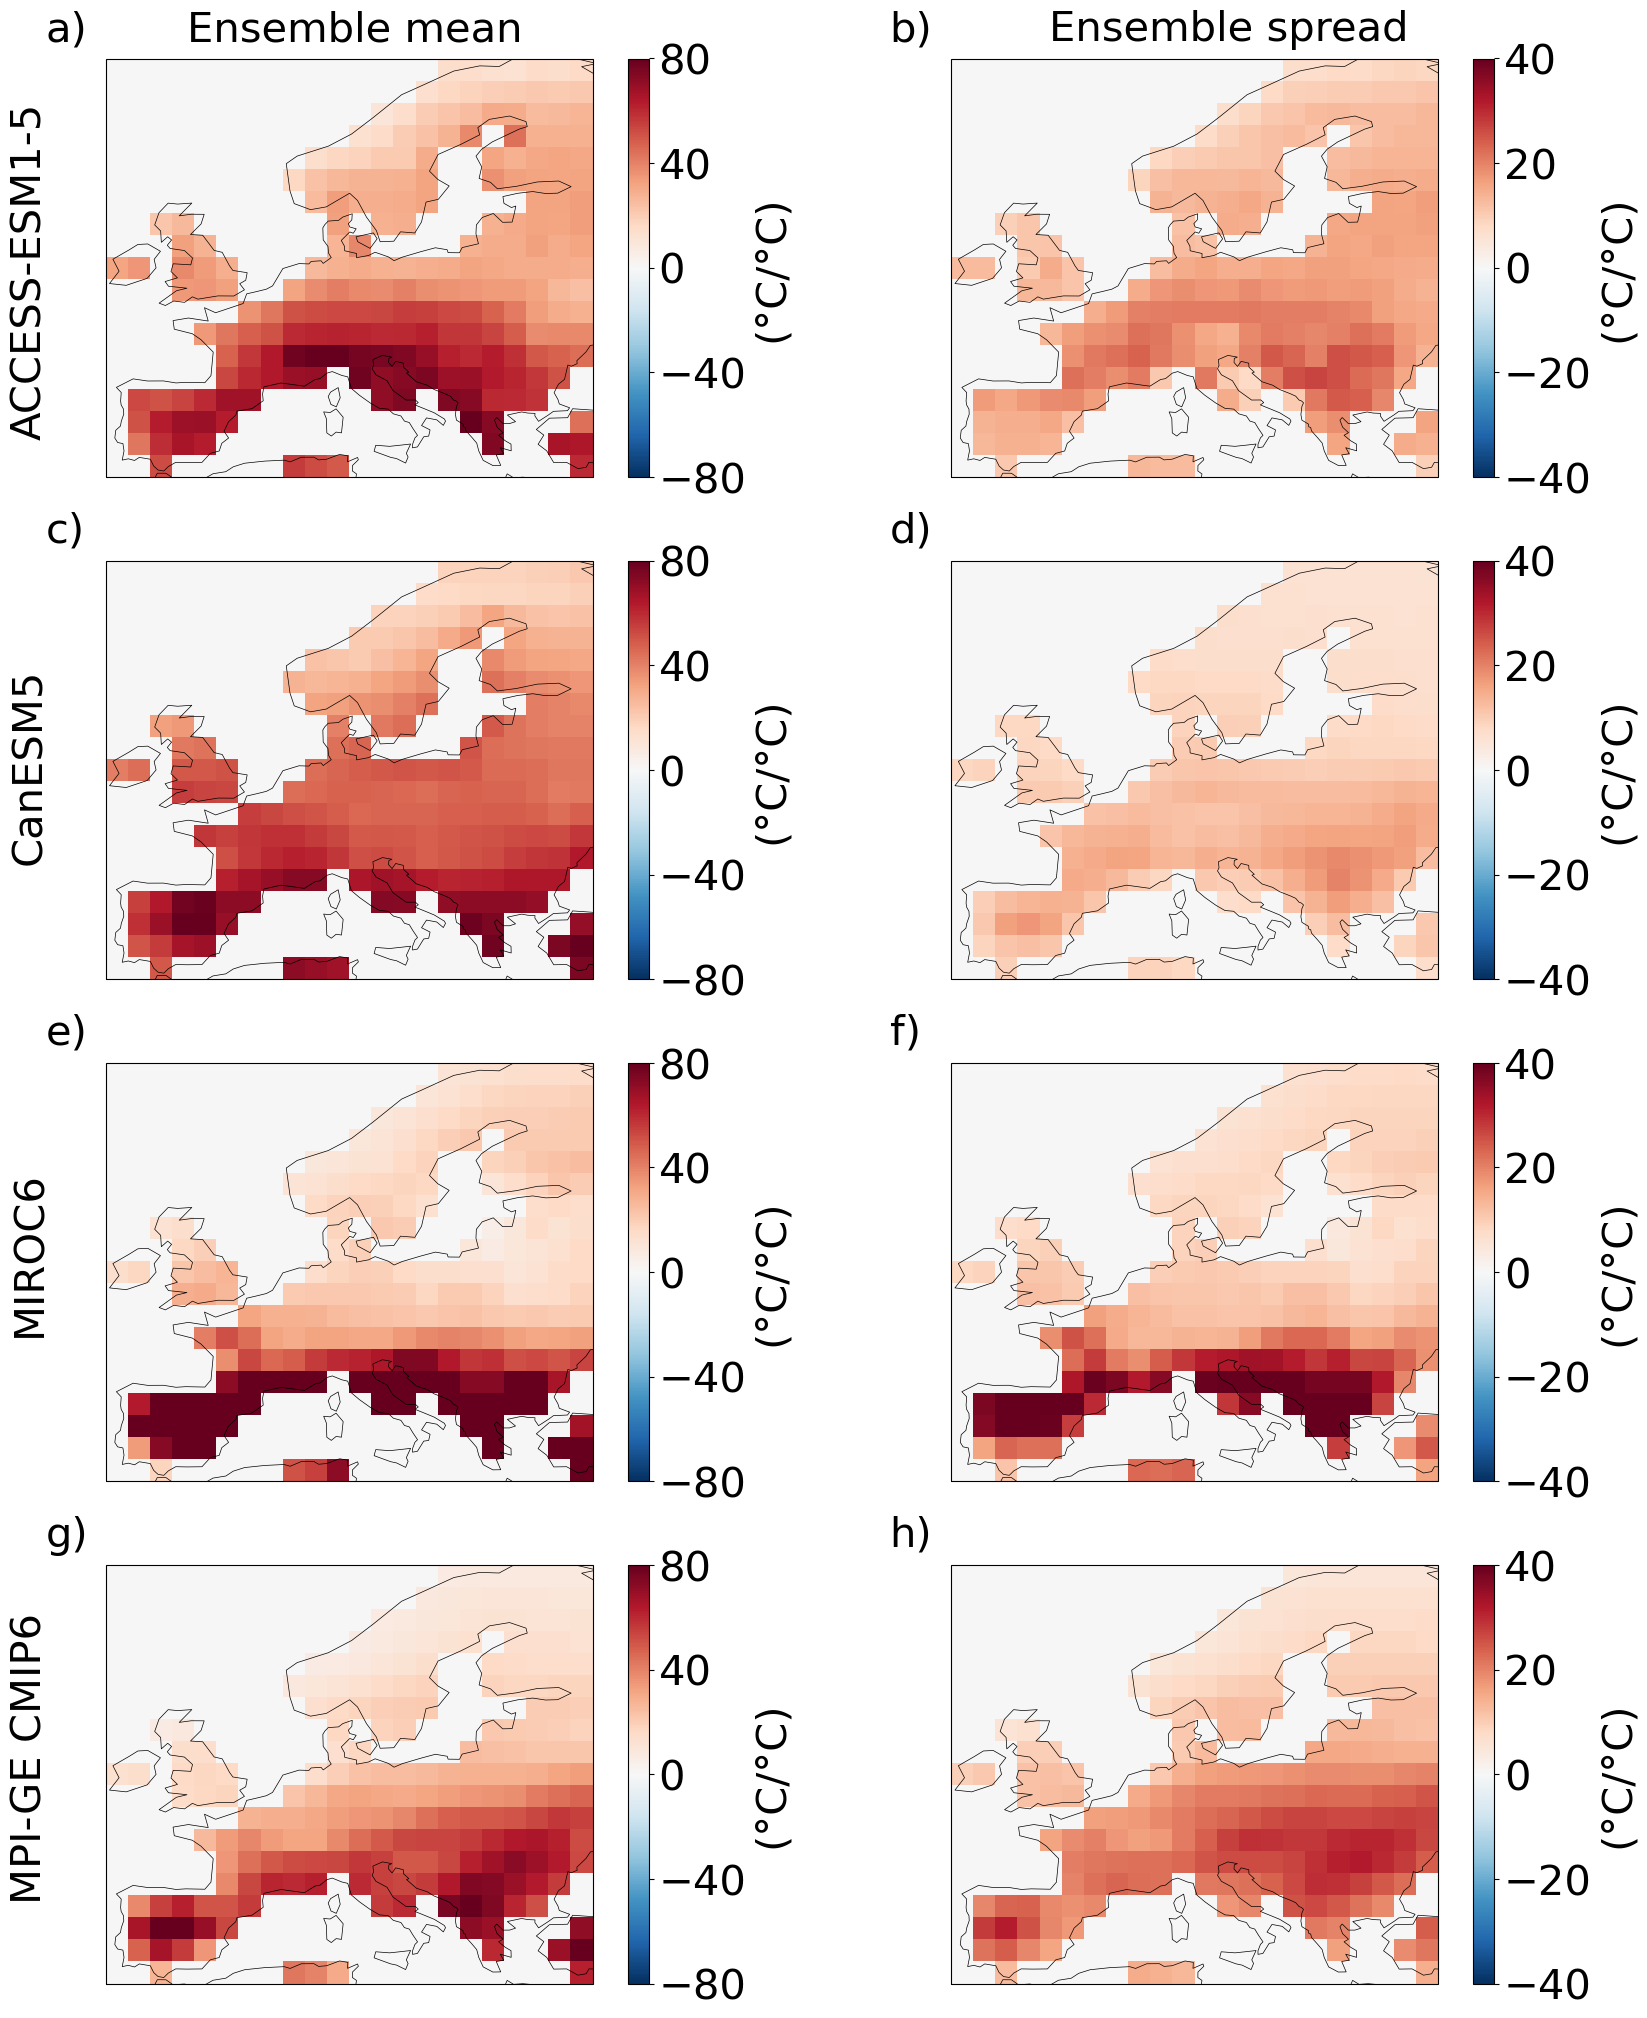

In [32]:
fig = plt.figure(figsize=(20,25))
plt.rcParams.update({'font.size': 30})
y_lim_min = -80
y_lim_max = -y_lim_min
y_lim_min2 = -40
y_lim_max2 = -y_lim_min2
ticks_list = np.arange(y_lim_min,y_lim_max+1,40)
ticks_list2 = np.arange(y_lim_min2,y_lim_max2+1,20)

# ------------------------------------ ACCESS ------------------------------------
ax = fig.add_subplot(4,2,1, projection=ccrs.PlateCarree())
plt.pcolormesh(mask_eu_access.lon,mask_eu_access.lat,lin_regres_GMTA_exceed_mean_gp2_access,cmap=plt.cm.get_cmap('RdBu_r'),vmin=y_lim_min,vmax=y_lim_max)
plt.pcolor(mask_eu_access.lon,mask_eu_access.lat,hatch_mean_access,hatch='//',cmap=plt.cm.get_cmap('RdBu_r'),vmin=y_lim_min,vmax=y_lim_max)
plt.colorbar(label='(°C/°C)',ticks=ticks_list)
ax.coastlines(resolution='110m',lw=0.5,color='k'); ax.set_facecolor('w')
#plt.title('mean')

ax = fig.add_subplot(4,2,2, projection=ccrs.PlateCarree())
plt.pcolormesh(mask_eu_access.lon,mask_eu_access.lat,lin_regres_GMTA_exceed_std_gp2_access,cmap=plt.cm.get_cmap('RdBu_r'),vmin=y_lim_min2,vmax=y_lim_max2)
plt.pcolor(mask_eu_access.lon,mask_eu_access.lat,hatch_std_access,hatch='//',cmap=plt.cm.get_cmap('RdBu_r'),vmin=y_lim_min2,vmax=y_lim_max2)
plt.colorbar(label='(°C/°C)',ticks=ticks_list2)
ax.coastlines(resolution='110m',lw=0.5,color='k'); ax.set_facecolor('w')
#plt.title('std')

# ------------------------------------ CanESM ------------------------------------
ax = fig.add_subplot(4,2,3, projection=ccrs.PlateCarree())
plt.pcolormesh(mask_eu_canesm.lon,mask_eu_canesm.lat,lin_regres_GMTA_exceed_mean_gp2_canesm,cmap=plt.cm.get_cmap('RdBu_r'),vmin=y_lim_min,vmax=y_lim_max)
plt.pcolor(mask_eu_canesm.lon,mask_eu_canesm.lat,hatch_mean_canesm,hatch='//',cmap=plt.cm.get_cmap('RdBu_r'),vmin=y_lim_min,vmax=y_lim_max)
plt.colorbar(label='(°C/°C)',ticks=ticks_list)
ax.coastlines(resolution='110m',lw=0.5,color='k'); ax.set_facecolor('w')
#plt.title('mean')

ax = fig.add_subplot(4,2,4, projection=ccrs.PlateCarree())
plt.pcolormesh(mask_eu_canesm.lon,mask_eu_canesm.lat,lin_regres_GMTA_exceed_std_gp2_canesm,cmap=plt.cm.get_cmap('RdBu_r'),vmin=y_lim_min2,vmax=y_lim_max2)
plt.pcolor(mask_eu_canesm.lon,mask_eu_canesm.lat,hatch_std_canesm,hatch='//',cmap=plt.cm.get_cmap('RdBu_r'),vmin=y_lim_min2,vmax=y_lim_max2)
plt.colorbar(label='(°C/°C)',ticks=ticks_list2)
ax.coastlines(resolution='110m',lw=0.5,color='k'); ax.set_facecolor('w')
#plt.title('std')

# ------------------------------------ MIROC6 ------------------------------------
ax = fig.add_subplot(4,2,5, projection=ccrs.PlateCarree())
plt.pcolormesh(mask_eu_miroc.lon,mask_eu_miroc.lat,lin_regres_GMTA_exceed_mean_gp2_miroc,cmap=plt.cm.get_cmap('RdBu_r'),vmin=y_lim_min,vmax=y_lim_max)
plt.pcolor(mask_eu_miroc.lon,mask_eu_miroc.lat,hatch_mean_miroc,hatch='//',cmap=plt.cm.get_cmap('RdBu_r'),vmin=y_lim_min,vmax=y_lim_max)
plt.colorbar(label='(°C/°C)',ticks=ticks_list)
ax.coastlines(resolution='110m',lw=0.5,color='k'); ax.set_facecolor('w')
#plt.title('mean')

ax = fig.add_subplot(4,2,6, projection=ccrs.PlateCarree())
plt.pcolormesh(mask_eu_miroc.lon,mask_eu_miroc.lat,lin_regres_GMTA_exceed_std_gp2_miroc,cmap=plt.cm.get_cmap('RdBu_r'),vmin=y_lim_min2,vmax=y_lim_max2)
plt.pcolor(mask_eu_miroc.lon,mask_eu_miroc.lat,hatch_std_miroc,hatch='//',cmap=plt.cm.get_cmap('RdBu_r'),vmin=y_lim_min2,vmax=y_lim_max2)
plt.colorbar(label='(°C/°C)',ticks=ticks_list2)
ax.coastlines(resolution='110m',lw=0.5,color='k'); ax.set_facecolor('w')
#plt.title('std')

# ------------------------------------ MPI ------------------------------------
ax = fig.add_subplot(4,2,7, projection=ccrs.PlateCarree())
plt.pcolormesh(mask_eu_miroc.lon,mask_eu_miroc.lat,lin_regres_GMTA_exceed_mean_gp2_mpi,cmap=plt.cm.get_cmap('RdBu_r'),vmin=y_lim_min,vmax=y_lim_max)
plt.pcolor(mask_eu_miroc.lon,mask_eu_miroc.lat,hatch_mean_mpi,hatch='//',cmap=plt.cm.get_cmap('RdBu_r'),vmin=y_lim_min,vmax=y_lim_max)
plt.colorbar(label='(°C/°C)',ticks=ticks_list)
ax.coastlines(resolution='110m',lw=0.5,color='k'); ax.set_facecolor('w')
#plt.title('mean')

ax = fig.add_subplot(4,2,8, projection=ccrs.PlateCarree())
plt.pcolormesh(mask_eu_miroc.lon,mask_eu_miroc.lat,lin_regres_GMTA_exceed_std_gp2_mpi,cmap=plt.cm.get_cmap('RdBu_r'),vmin=y_lim_min2,vmax=y_lim_max2)
plt.pcolor(mask_eu_miroc.lon,mask_eu_miroc.lat,hatch_std_mpi,hatch='//',cmap=plt.cm.get_cmap('RdBu_r'),vmin=y_lim_min2,vmax=y_lim_max2)
plt.colorbar(label='(°C/°C)',ticks=ticks_list2)
ax.coastlines(resolution='110m',lw=0.5,color='k'); ax.set_facecolor('w')
#plt.title('std')

#model names
plt.text(-90,167,'ACCESS-ESM1-5',rotation='vertical')
plt.text(-90,131,'CanESM5',rotation='vertical')
plt.text(-90,91,'MIROC6',rotation='vertical')
plt.text(-90,43,'MPI-GE CMIP6',rotation='vertical')

plt.text(-75,200,'Ensemble mean')
plt.text(-2,200,'Ensemble spread')

plt.text(-87,200,'a)')
plt.text(-15.5,200,'b)')
plt.text(-87,157.5,'c)')
plt.text(-15.5,157.5,'d)')
plt.text(-87,115,'e)')
plt.text(-15.5,115,'f)')
plt.text(-87,72.5,'g)')
plt.text(-15.5,72.5,'h)')

plt.savefig(plot_path + 'FINAL_SMILE_fig_2',bbox_inches="tight",dpi=300) #dpi=600)

In [33]:
print('Access')
print(lin_regres_GMTA_exceed_mean_gp2_access.max())
print('Canesm')
print(lin_regres_GMTA_exceed_mean_gp2_canesm.max())
print('Miroc6')
print(lin_regres_GMTA_exceed_mean_gp2_miroc.max())
print('MPI')
print(lin_regres_GMTA_exceed_mean_gp2_mpi.max())

Access
82.16758203030486
Canesm
84.10065091633288
Miroc6
196.85176592048205
MPI
98.06159177606582


In [34]:
print('Access')
print(lin_regres_GMTA_exceed_std_gp2_access.max())
print('Canesm')
print(lin_regres_GMTA_exceed_std_gp2_canesm.max())
print('Miroc6')
print(lin_regres_GMTA_exceed_std_gp2_miroc.max())
print('MPI')
print(lin_regres_GMTA_exceed_std_gp2_mpi.max())

Access
26.88411084844942
Canesm
19.79176464793101
Miroc6
52.43849749765313
MPI
31.869648966233132


In [35]:
#Averages
lin_regres_GMTA_exceed_mean_gp2_all = (lin_regres_GMTA_exceed_mean_gp2_mpi + lin_regres_GMTA_exceed_mean_gp2_miroc + lin_regres_GMTA_exceed_mean_gp2_access + lin_regres_GMTA_exceed_mean_gp2_canesm)/4
lin_regres_GMTA_exceed_std_gp2_all = (lin_regres_GMTA_exceed_std_gp2_mpi + lin_regres_GMTA_exceed_std_gp2_miroc + lin_regres_GMTA_exceed_std_gp2_access + lin_regres_GMTA_exceed_std_gp2_canesm)/4

In [36]:
#significan when 3 or more models agree on sign
mpi_mean_binary = np.where(lin_regres_GMTA_exceed_mean_gp2_mpi>0,1,0)
canesm_mean_binary = np.where(lin_regres_GMTA_exceed_mean_gp2_canesm>0,1,0)
miroc_mean_binary = np.where(lin_regres_GMTA_exceed_mean_gp2_miroc>0,1,0)
access_mean_binary = np.where(lin_regres_GMTA_exceed_mean_gp2_access>0,1,0)

mean_binary = mpi_mean_binary + canesm_mean_binary + miroc_mean_binary + access_mean_binary
mean_binary = np.where((mean_binary>=3)|(mean_binary<=1),1,0)
joker = np.where(mask_eu==0,np.nan,mean_binary)
mean_binary_hatch_sign = np.ma.masked_greater(joker, 0.05)
mean_binary_hatch_sign.data[:,:] = np.where(mask_eu==0,np.nan,lin_regres_GMTA_exceed_mean_gp2_all[:,:])

mpi_std_binary = np.where(lin_regres_GMTA_exceed_std_gp2_mpi>0,1,0)
canesm_std_binary = np.where(lin_regres_GMTA_exceed_std_gp2_canesm>0,1,0)
miroc_std_binary = np.where(lin_regres_GMTA_exceed_std_gp2_miroc>0,1,0)
access_std_binary = np.where(lin_regres_GMTA_exceed_std_gp2_access>0,1,0)

std_binary = mpi_std_binary + canesm_std_binary + miroc_std_binary + access_std_binary
std_binary = np.where((std_binary>=3)|(std_binary<=1),1,0)
joker = np.where(mask_eu==0,np.nan,std_binary)
std_binary_hatch_sign = np.ma.masked_greater(joker, 0.05)
std_binary_hatch_sign.data[:,:] = np.where(mask_eu==0,np.nan,lin_regres_GMTA_exceed_std_gp2_all[:,:])

In [38]:
#significan when 3 or more models are significant
access_mean_binary = np.where(hatch_mean_access.mask,1,0)
canesm_mean_binary = np.where(hatch_mean_canesm.mask,1,0)
miroc_mean_binary = np.where(hatch_mean_miroc.mask,1,0)
mpi_mean_binary = np.where(hatch_mean_mpi.mask,1,0)

mean_binary = mpi_mean_binary + canesm_mean_binary + miroc_mean_binary + access_mean_binary
mean_binary = np.where((mean_binary>=3),1,0)
joker = np.where(mask_eu==0,np.nan,mean_binary)
mean_binary_hatch_test = np.ma.masked_greater(joker, 0.05)
mean_binary_hatch_test.data[:,:] = np.where(mask_eu==0,np.nan,lin_regres_GMTA_exceed_mean_gp2_all[:,:])

mpi_std_binary = np.where(hatch_std_mpi.mask,1,0)
canesm_std_binary = np.where(hatch_std_canesm.mask,1,0)
miroc_std_binary = np.where(hatch_std_miroc.mask,1,0)
access_std_binary = np.where(hatch_std_access.mask,1,0)

std_binary = mpi_std_binary + canesm_std_binary + miroc_std_binary + access_std_binary
std_binary = np.where((std_binary>=3),1,0)
joker = np.where(mask_eu==0,np.nan,std_binary)
std_binary_hatch_test = np.ma.masked_greater(joker, 0.05)
std_binary_hatch_test.data[:,:] = np.where(mask_eu==0,np.nan,lin_regres_GMTA_exceed_std_gp2_all[:,:])

In [40]:
#significant with three models agreeing sign and being significant
mean_binary_hatch_combine = np.where((mean_binary_hatch_test.mask==1) & (mean_binary_hatch_sign.mask==1),1,0).astype(float)
mean_binary_hatch_combine = np.ma.masked_greater(mean_binary_hatch_combine, 0.05)
mean_binary_hatch_combine.data[:,:] = np.where(mask_eu==0,np.nan,lin_regres_GMTA_exceed_std_gp2_all[:,:])

std_binary_hatch_combine = np.where((std_binary_hatch_test.mask==1) & (std_binary_hatch_sign.mask==1),1,0).astype(float)
std_binary_hatch_combine = np.ma.masked_greater(std_binary_hatch_combine, 0.05)
std_binary_hatch_combine.data[:,:] = np.where(mask_eu==0,np.nan,lin_regres_GMTA_exceed_std_gp2_all[:,:])

/tmp/ipykernel_1173677/1100400359.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.pcolormesh(mask_eu_access.lon,mask_eu_access.lat,lin_regres_GMTA_exceed_mean_gp2_all,cmap=plt.cm.get_cmap('RdBu_r'),vmin=y_lim_min,vmax=y_lim_max)
/tmp/ipykernel_1173677/1100400359.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.pcolor(mask_eu_access.lon,mask_eu_access.lat,mean_binary_hatch_combine,hatch='//',cmap=plt.cm.get_cmap('RdBu_r'),vmin=y_lim_min,vmax=y_lim_max)
/tmp/ipykernel_1173677/1100400359.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matp

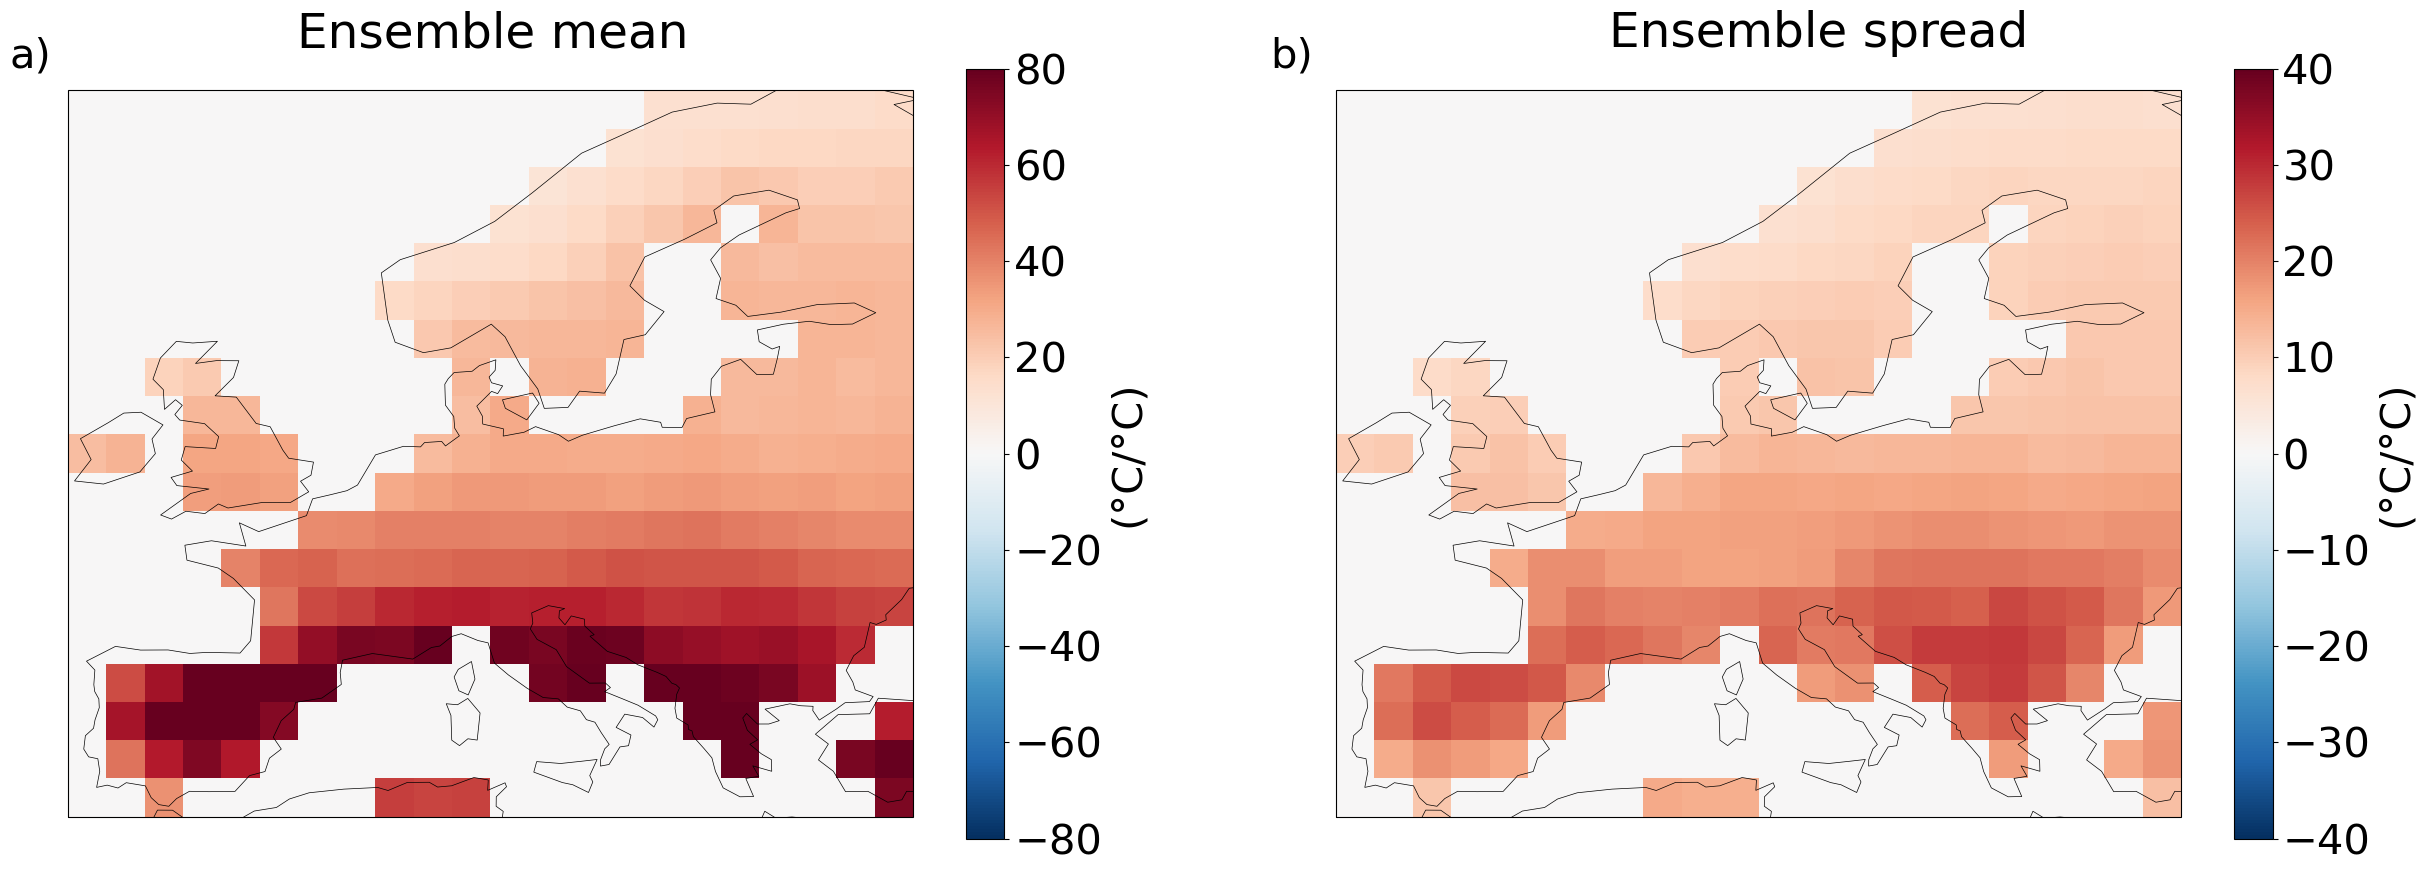

In [41]:
fig = plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 30})
y_lim_min = -80
y_lim_max = 80
y_lim_min2 = -40
y_lim_max2 = 40

ax = fig.add_subplot(1,2,1, projection=ccrs.PlateCarree())
plt.pcolormesh(mask_eu_access.lon,mask_eu_access.lat,lin_regres_GMTA_exceed_mean_gp2_all,cmap=plt.cm.get_cmap('RdBu_r'),vmin=y_lim_min,vmax=y_lim_max)
plt.pcolor(mask_eu_access.lon,mask_eu_access.lat,mean_binary_hatch_combine,hatch='//',cmap=plt.cm.get_cmap('RdBu_r'),vmin=y_lim_min,vmax=y_lim_max)
plt.colorbar(label='(°C/°C)')
ax.coastlines(resolution='110m',lw=0.5,color='k'); ax.set_facecolor('w')

ax = fig.add_subplot(1,2,2, projection=ccrs.PlateCarree())
plt.pcolormesh(mask_eu_access.lon,mask_eu_access.lat,lin_regres_GMTA_exceed_std_gp2_all,cmap=plt.cm.get_cmap('RdBu_r'),vmin=y_lim_min2,vmax=y_lim_max2)
plt.pcolor(mask_eu_access.lon,mask_eu_access.lat,std_binary_hatch_combine,hatch='//',cmap=plt.cm.get_cmap('RdBu_r'),vmin=y_lim_min2,vmax=y_lim_max2)
plt.colorbar(label='(°C/°C)')
ax.coastlines(resolution='110m',lw=0.5,color='k'); ax.set_facecolor('w')

#add plot reference
plt.text(-75,72,'a)',fontsize=30)
plt.text(-13.5,72,'b)',fontsize=30)

plt.text(-61,73,'Ensemble mean',fontsize=35)
plt.text(3,73,'Ensemble spread',fontsize=35)

plt.savefig(plot_path + 'FINAL_SMILE_MEAN_fig_2',bbox_inches="tight",dpi=300) #dpi=600)